# BANK MARKETING: Predicting Whether The Customer Will Subscribe To Term Deposit (FIXED DEPOSIT) or not.

# 1. Introduction

# Business Use Case
There has been a revenue decline for a Portuguese bank and they would like to know what actions to take. After investigation, they found out that the root cause is that their clients are not depositing as frequently as before. Knowing that term deposits allow banks to hold onto a deposit for a specific amount of time, so banks can invest in higher gain financial products to make a profit. In addition, banks also hold better chance to persuade term deposit clients into buying other products such as funds or insurance to further increase their revenues. As a result, the Portuguese bank would like to identify existing clients that have higher chance to subscribe for a term deposit and focus marketing efforts on such clients


# Project Description
Your client is a retail banking institution. Term deposits are a major source of income for a bank. A term deposit is a cash investment held at a financial institution. Your money is invested for an agreed rate of interest over a fixed amount of time, or term. The bank has various outreach plans to sell term deposits to their customers such as email marketing, advertisements, telephonic marketing and digital marketing. Telephonic marketing campaigns still remain one of the most effective way to reach out to people. However, they require huge investment as large call centers are hired to actually execute these campaigns. Hence, it is crucial to identify the customers most likely to convert beforehand so that they can be specifically targeted via call.
You are provided with the client data such as : age of the client, their job type, their marital status, etc. Along with the client data, you are also provided with the information of the call such as the duration of the call, day and month of the call, etc. Given this information, your task is to predict if the client will subscribe to term deposit.


# About The Dataset
The dataset is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal of this dataset is to predict if the client or the customer of polish banking institution will subscribe a term deposit product of the bank or not. 


# You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the client and call details as well as the target variable “subscribed”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict whether a new set of clients will subscribe the term deposit.


# Dataset Attributes

Here is the description of all the variables:

- ID: Unique client ID
- age: Age of the client
- job: Type of job
- marital: Marital status of the client
- education: Education level
- default: Credit in default.
- housing: Housing loan
- loan: Personal loan
- contact: Type of communication
- month: Contact month
- day_of_week: Day of week of contact
- duration: Contact duration
- campaign: Number of contacts performed during this campaign to the client
- pdays: Number of days that passed by after the client was last contacted
- previous: Number of contacts performed before this campaign
- poutcome: Outcome of the previous marketing campaign

# Output Variable (Target): 
- Subscribed: Indicates whether the client has subscribed to a term deposit (YES/NO)

**This project aims to develop a machine learning model using the provided dataset to predict whether a client will subscribe to a term deposit based on their characteristics and previous interactions with the bank.**

# 2. Data Cleaning

# Import important library :

In [2]:
import warnings
warnings.simplefilter("ignore")
import joblib

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
from scipy.stats import zscore
from sklearn.preprocessing import LabelEncoder


from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV 

In [3]:
df=pd.read_csv(r'https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_train.csv')

In [4]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


In [5]:
df.head()#first 5 rows

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,26110,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,40576,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,15320,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,43962,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,29842,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no


In [6]:
df[150:160]#middle 10 rows

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
150,31033,69,retired,married,primary,no,2346,no,no,cellular,11,feb,354,2,-1,0,unknown,yes
151,32881,33,admin.,single,secondary,no,91,yes,no,cellular,17,apr,400,2,-1,0,unknown,no
152,42323,24,blue-collar,married,secondary,no,272,no,no,cellular,16,nov,105,2,94,2,success,yes
153,9136,36,unemployed,single,primary,no,1201,yes,no,unknown,5,jun,57,1,-1,0,unknown,no
154,32384,26,technician,married,unknown,no,-277,yes,no,cellular,16,apr,1018,2,-1,0,unknown,no
155,24372,53,admin.,married,secondary,no,1661,yes,yes,cellular,17,nov,85,1,-1,0,unknown,no
156,15792,25,admin.,single,secondary,no,105,no,yes,cellular,21,jul,392,1,-1,0,unknown,no
157,29101,36,admin.,married,secondary,no,96,no,no,cellular,2,feb,302,1,-1,0,unknown,yes
158,23977,47,blue-collar,married,secondary,no,947,no,yes,cellular,29,aug,24,17,-1,0,unknown,no
159,41839,40,unemployed,single,tertiary,no,79,no,no,cellular,15,oct,570,1,135,1,failure,yes


In [7]:
df.tail()#last 5 rows

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
31642,36483,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,40178,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,19710,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,38556,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no
31646,14156,55,management,divorced,secondary,no,204,yes,no,cellular,11,jul,1973,2,-1,0,unknown,yes


# Exploratory Data Analysis (EDA)

In [8]:
df.shape

(31647, 18)

The dataset comprises 31,647 rows and 18 columns.

In [9]:
df.dtypes

ID             int64
age            int64
job           object
marital       object
education     object
default       object
balance        int64
housing       object
loan          object
contact       object
day            int64
month         object
duration       int64
campaign       int64
pdays          int64
previous       int64
poutcome      object
subscribed    object
dtype: object

The columns Job, Marital, Education, Default, Housing, Loan, Contact, Month, Poutcome, and Subscribed contain categorical data.

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ID          31647 non-null  int64 
 1   age         31647 non-null  int64 
 2   job         31647 non-null  object
 3   marital     31647 non-null  object
 4   education   31647 non-null  object
 5   default     31647 non-null  object
 6   balance     31647 non-null  int64 
 7   housing     31647 non-null  object
 8   loan        31647 non-null  object
 9   contact     31647 non-null  object
 10  day         31647 non-null  int64 
 11  month       31647 non-null  object
 12  duration    31647 non-null  int64 
 13  campaign    31647 non-null  int64 
 14  pdays       31647 non-null  int64 
 15  previous    31647 non-null  int64 
 16  poutcome    31647 non-null  object
 17  subscribed  31647 non-null  object
dtypes: int64(8), object(10)
memory usage: 4.3+ MB


The dataset contains two types of data: object and integer.

In [11]:
df.duplicated().sum()

0

The dataset does not contain any duplicated values.

In [12]:
df.describe()

,ID,age,balance,day,duration,campaign,pdays,previous
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000
mean,22563.972162,40.957247,1363.890258,15.835466,258.113534,2.765697,39.576042,0.574272
std,13075.936990,10.625134,3028.304293,8.337097,257.118973,3.113830,99.317592,2.422529
min,2.000000,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,11218.000000,33.000000,73.000000,8.000000,104.000000,1.000000,-1.000000,0.000000
50%,22519.000000,39.000000,450.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,33879.500000,48.000000,1431.000000,21.000000,318.500000,3.000000,-1.000000,0.000000
max,45211.000000,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


Observations:

- The count of all the columns is equal, indicating no null values present in the dataset.
- For columns like age, balance, campaign, pdays, and previous, the mean is greater than the median, suggesting right-skewed data distribution.
- For the "day" column, the mean is lower than the median, indicating left-skewed data.
- There is a significant gap between the 75th percentile and the maximum values in columns like age, balance, day, duration, campaign, and previous, indicating the presence of outliers.
- The "balance" and "pdays" columns exhibit a very high difference between the 75th percentile and the maximum value, suggesting the presence of numerous outliers in these columns.

In [13]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

ID
26110    1
13339    1
39681    1
15135    1
26037    1
        ..
1247     1
15584    1
25376    1
38699    1
14156    1
Name: count, Length: 31647, dtype: int64


age
32    1457
31    1417
33    1406
34    1321
35    1314
      ... 
92       1
95       1
93       1
94       1
90       1
Name: count, Length: 76, dtype: int64


job
blue-collar      6842
management       6639
technician       5307
admin.           3631
services         2903
retired          1574
self-employed    1123
entrepreneur     1008
unemployed        905
housemaid         874
student           635
unknown           206
Name: count, dtype: int64


marital
married     19095
single       8922
divorced     3630
Name: count, dtype: int64


education
secondary    16224
tertiary      9301
primary       4808
unknown       1314
Name: count, dtype: int64


default
no     31062
yes      585
Name: count, dtype: int64


balance
 0        2470
 1         137
 2         109
 4          95
 3          88
          ... 
 15120  

In [14]:
df['subscribed'].value_counts()

subscribed
no     27932
yes     3715
Name: count, dtype: int64

We can clearly observe a class imbalance problem in the dataset. Later on, we'll need to address this issue.

In [15]:
df.nunique().to_frame('No of unique values')

,No of unique values
ID,31647
age,76
job,12
marital,3
education,4
default,2
balance,6326
housing,2
loan,2
contact,3


In [16]:
# Calculate counts and unique values for each column
Column_info=pd.DataFrame({'Column':df.columns,
                         'Count':df.count(),
                         'Unique Values':df.nunique()})
Column_info

,Column,Count,Unique Values
ID,ID,31647,31647
age,age,31647,76
job,job,31647,12
marital,marital,31647,3
education,education,31647,4
default,default,31647,2
balance,balance,31647,6326
housing,housing,31647,2
loan,loan,31647,2
contact,contact,31647,3


In [17]:
df.isnull().sum()

ID            0
age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [18]:
df.isnull().sum().sum()

0

<Axes: >

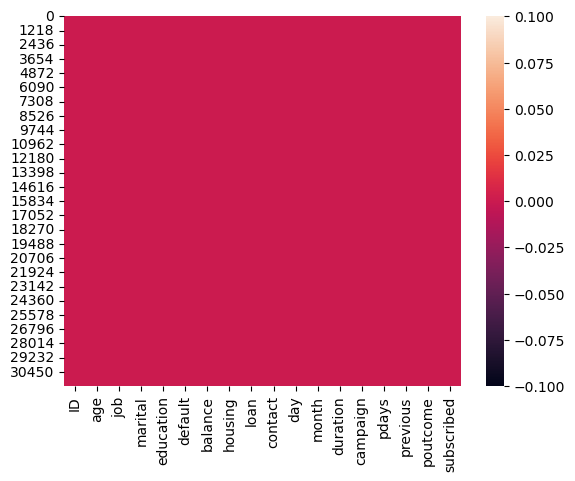

In [19]:
sns.heatmap(df.isnull())

It's evident from the graph above that there are no null values present in the dataset.

In [20]:
# Since the "ID" column contains nominal data, it's better to drop it before proceeding further.

In [21]:
df=df.drop(columns=['ID'],axis=1)
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,admin.,married,unknown,no,1933,no,no,telephone,19,nov,44,2,-1,0,unknown,no
1,31,unknown,married,secondary,no,3,no,no,cellular,20,jul,91,2,-1,0,unknown,no
2,27,services,married,secondary,no,891,yes,no,cellular,18,jul,240,1,-1,0,unknown,no
3,57,management,divorced,tertiary,no,3287,no,no,cellular,22,jun,867,1,84,3,success,yes
4,31,technician,married,secondary,no,119,yes,no,cellular,4,feb,380,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,management,single,tertiary,no,0,yes,no,cellular,12,may,116,2,-1,0,unknown,no
31643,53,management,divorced,tertiary,no,380,no,yes,cellular,5,jun,438,2,-1,0,unknown,yes
31644,32,management,single,tertiary,no,312,no,no,cellular,7,aug,37,3,-1,0,unknown,no
31645,57,technician,married,secondary,no,225,yes,no,telephone,15,may,22,7,337,12,failure,no


# 3. Data Visualization

# Univariate analysis-

# 1.CountPlot

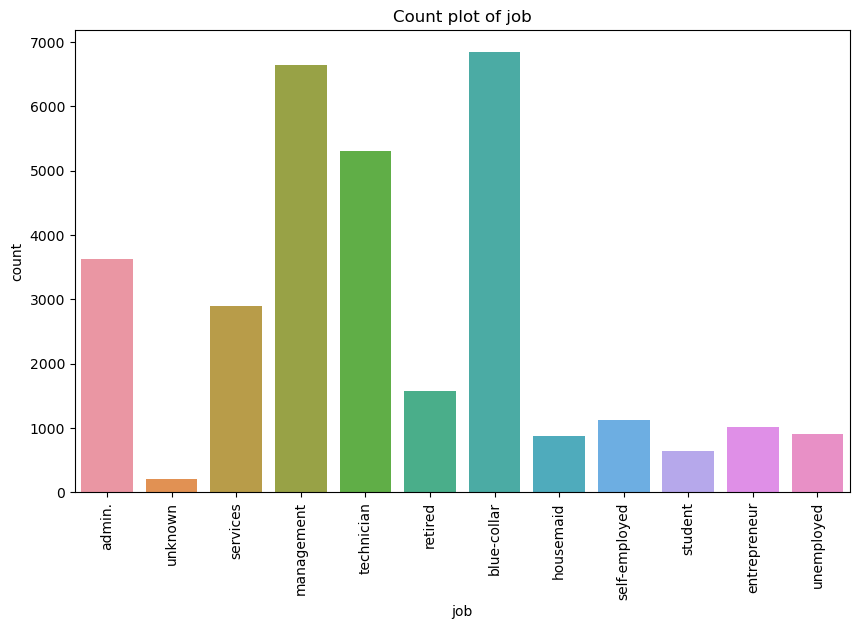

In [22]:
# Plot for 'job'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job')
plt.title('Count plot of job')
plt.xticks(rotation=90)
plt.show()


The count of individuals with blue-collar jobs is notably higher, as evidenced by the graph.

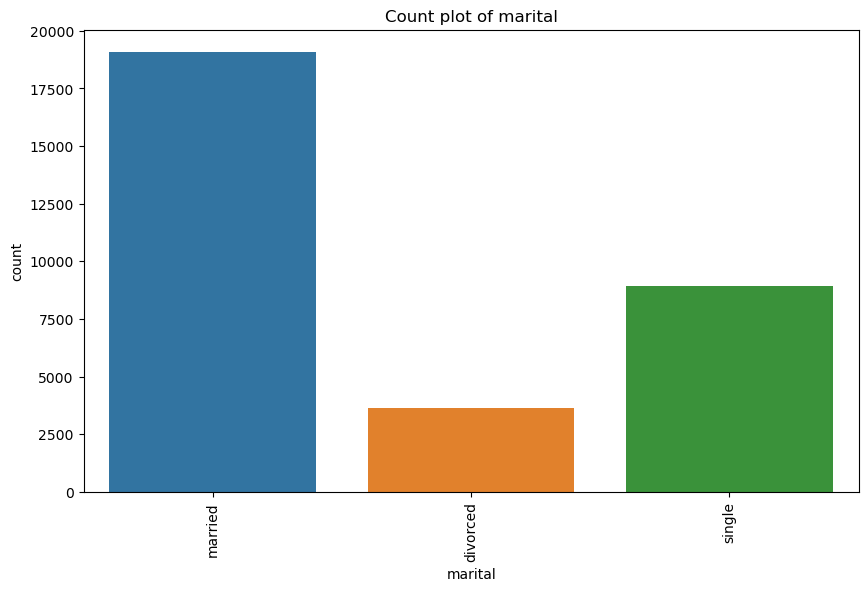

In [23]:
# Plot for 'marital'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital')
plt.title('Count plot of marital')
plt.xticks(rotation=90)
plt.show()


The count of married individuals is notably high in the dataset.

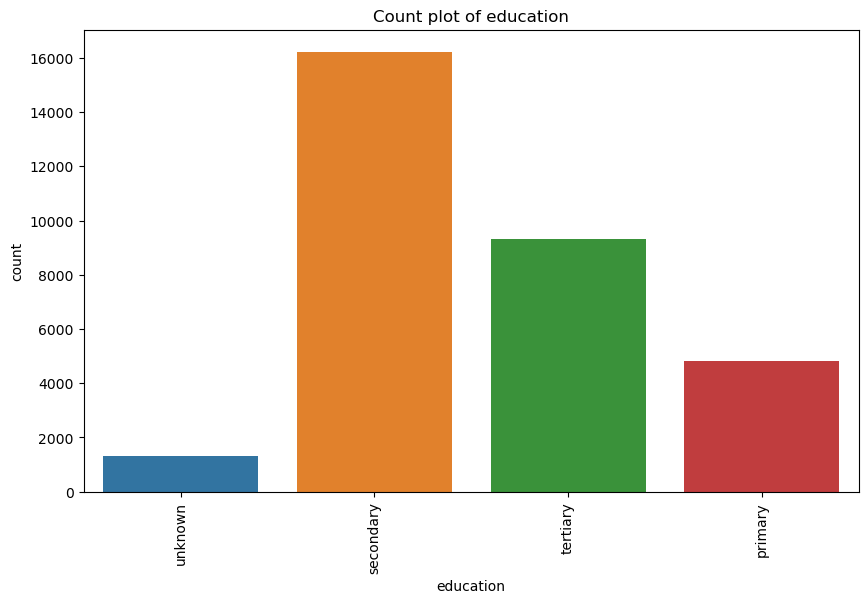

In [24]:
# Plot for 'education'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education')
plt.title('Count plot of education')
plt.xticks(rotation=90)
plt.show()


The count of individuals with secondary education is notably high in the dataset.

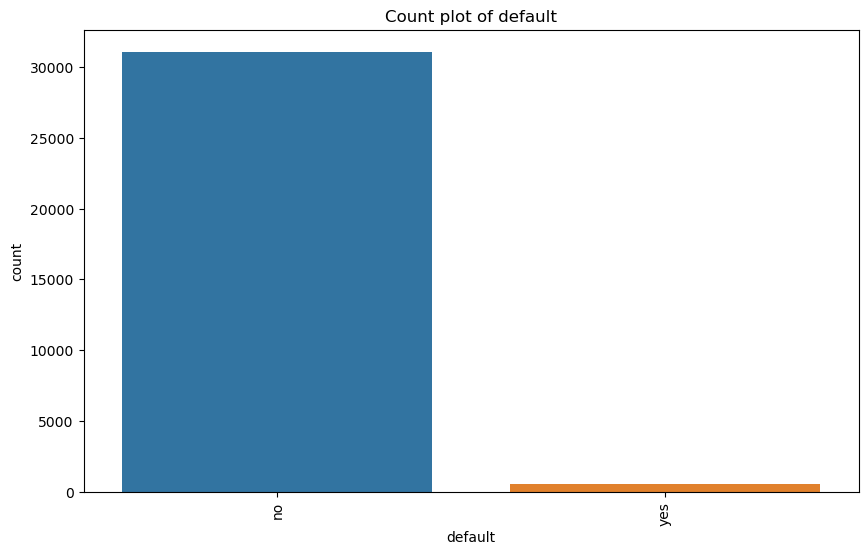

In [25]:
# Plot for 'default'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='default')
plt.title('Count plot of default')
plt.xticks(rotation=90)
plt.show()


The count of individuals with no credit in default is notably high in the dataset.

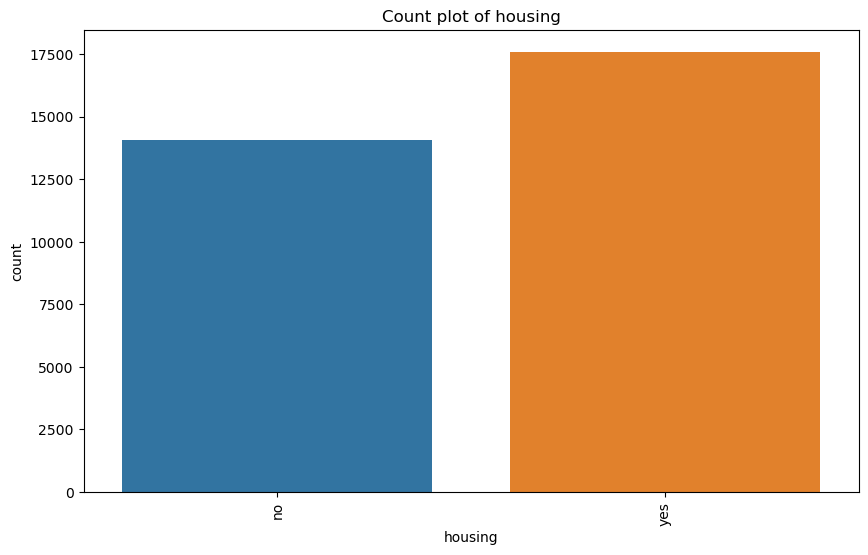

In [26]:
# Plot for 'housing'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='housing')
plt.title('Count plot of housing')
plt.xticks(rotation=90)
plt.show()

The count of individuals with housing loans is notably high in the dataset.

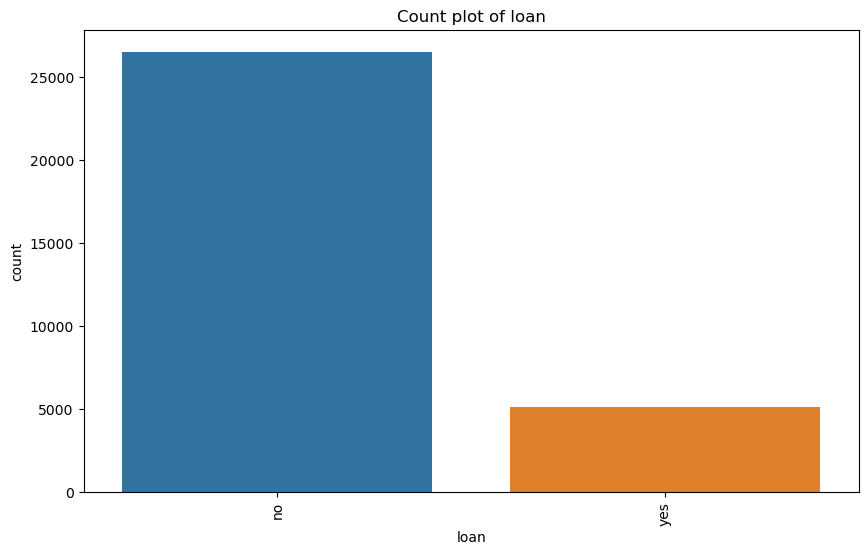

In [27]:
# Plot for 'loan'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan')
plt.title('Count plot of loan')
plt.xticks(rotation=90)
plt.show()

The count of individuals without personal loans is notably high in the dataset.

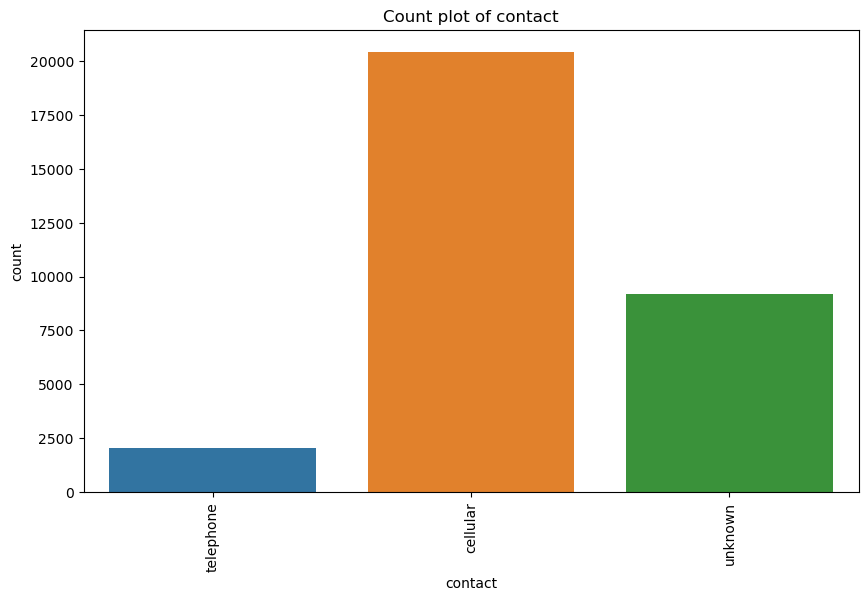

In [28]:
# Plot for 'contact'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='contact')
plt.title('Count plot of contact')
plt.xticks(rotation=90)
plt.show()

The count of individuals contacted via cellular contact is notably high.

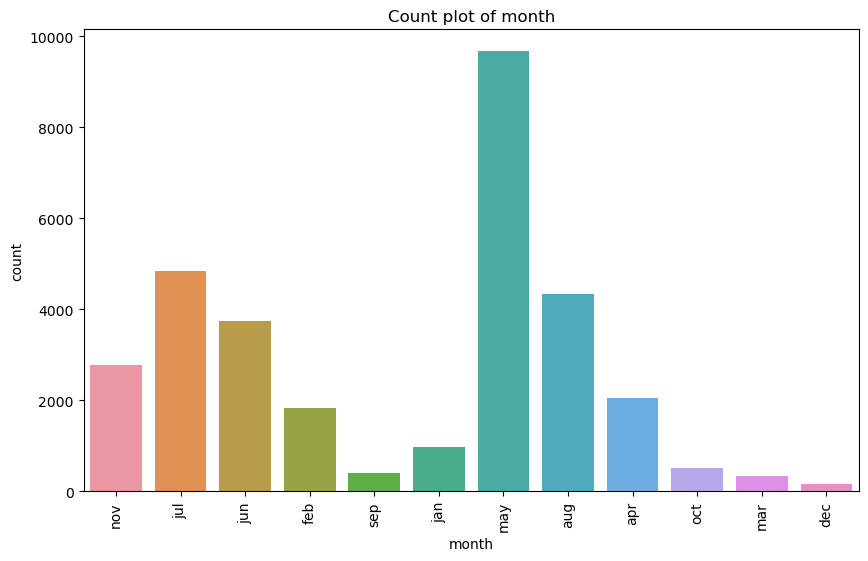

In [29]:
# Plot for 'month'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month')
plt.title('Count plot of month')
plt.xticks(rotation=90)
plt.show()

The count of individuals contacted in May month is notably high.

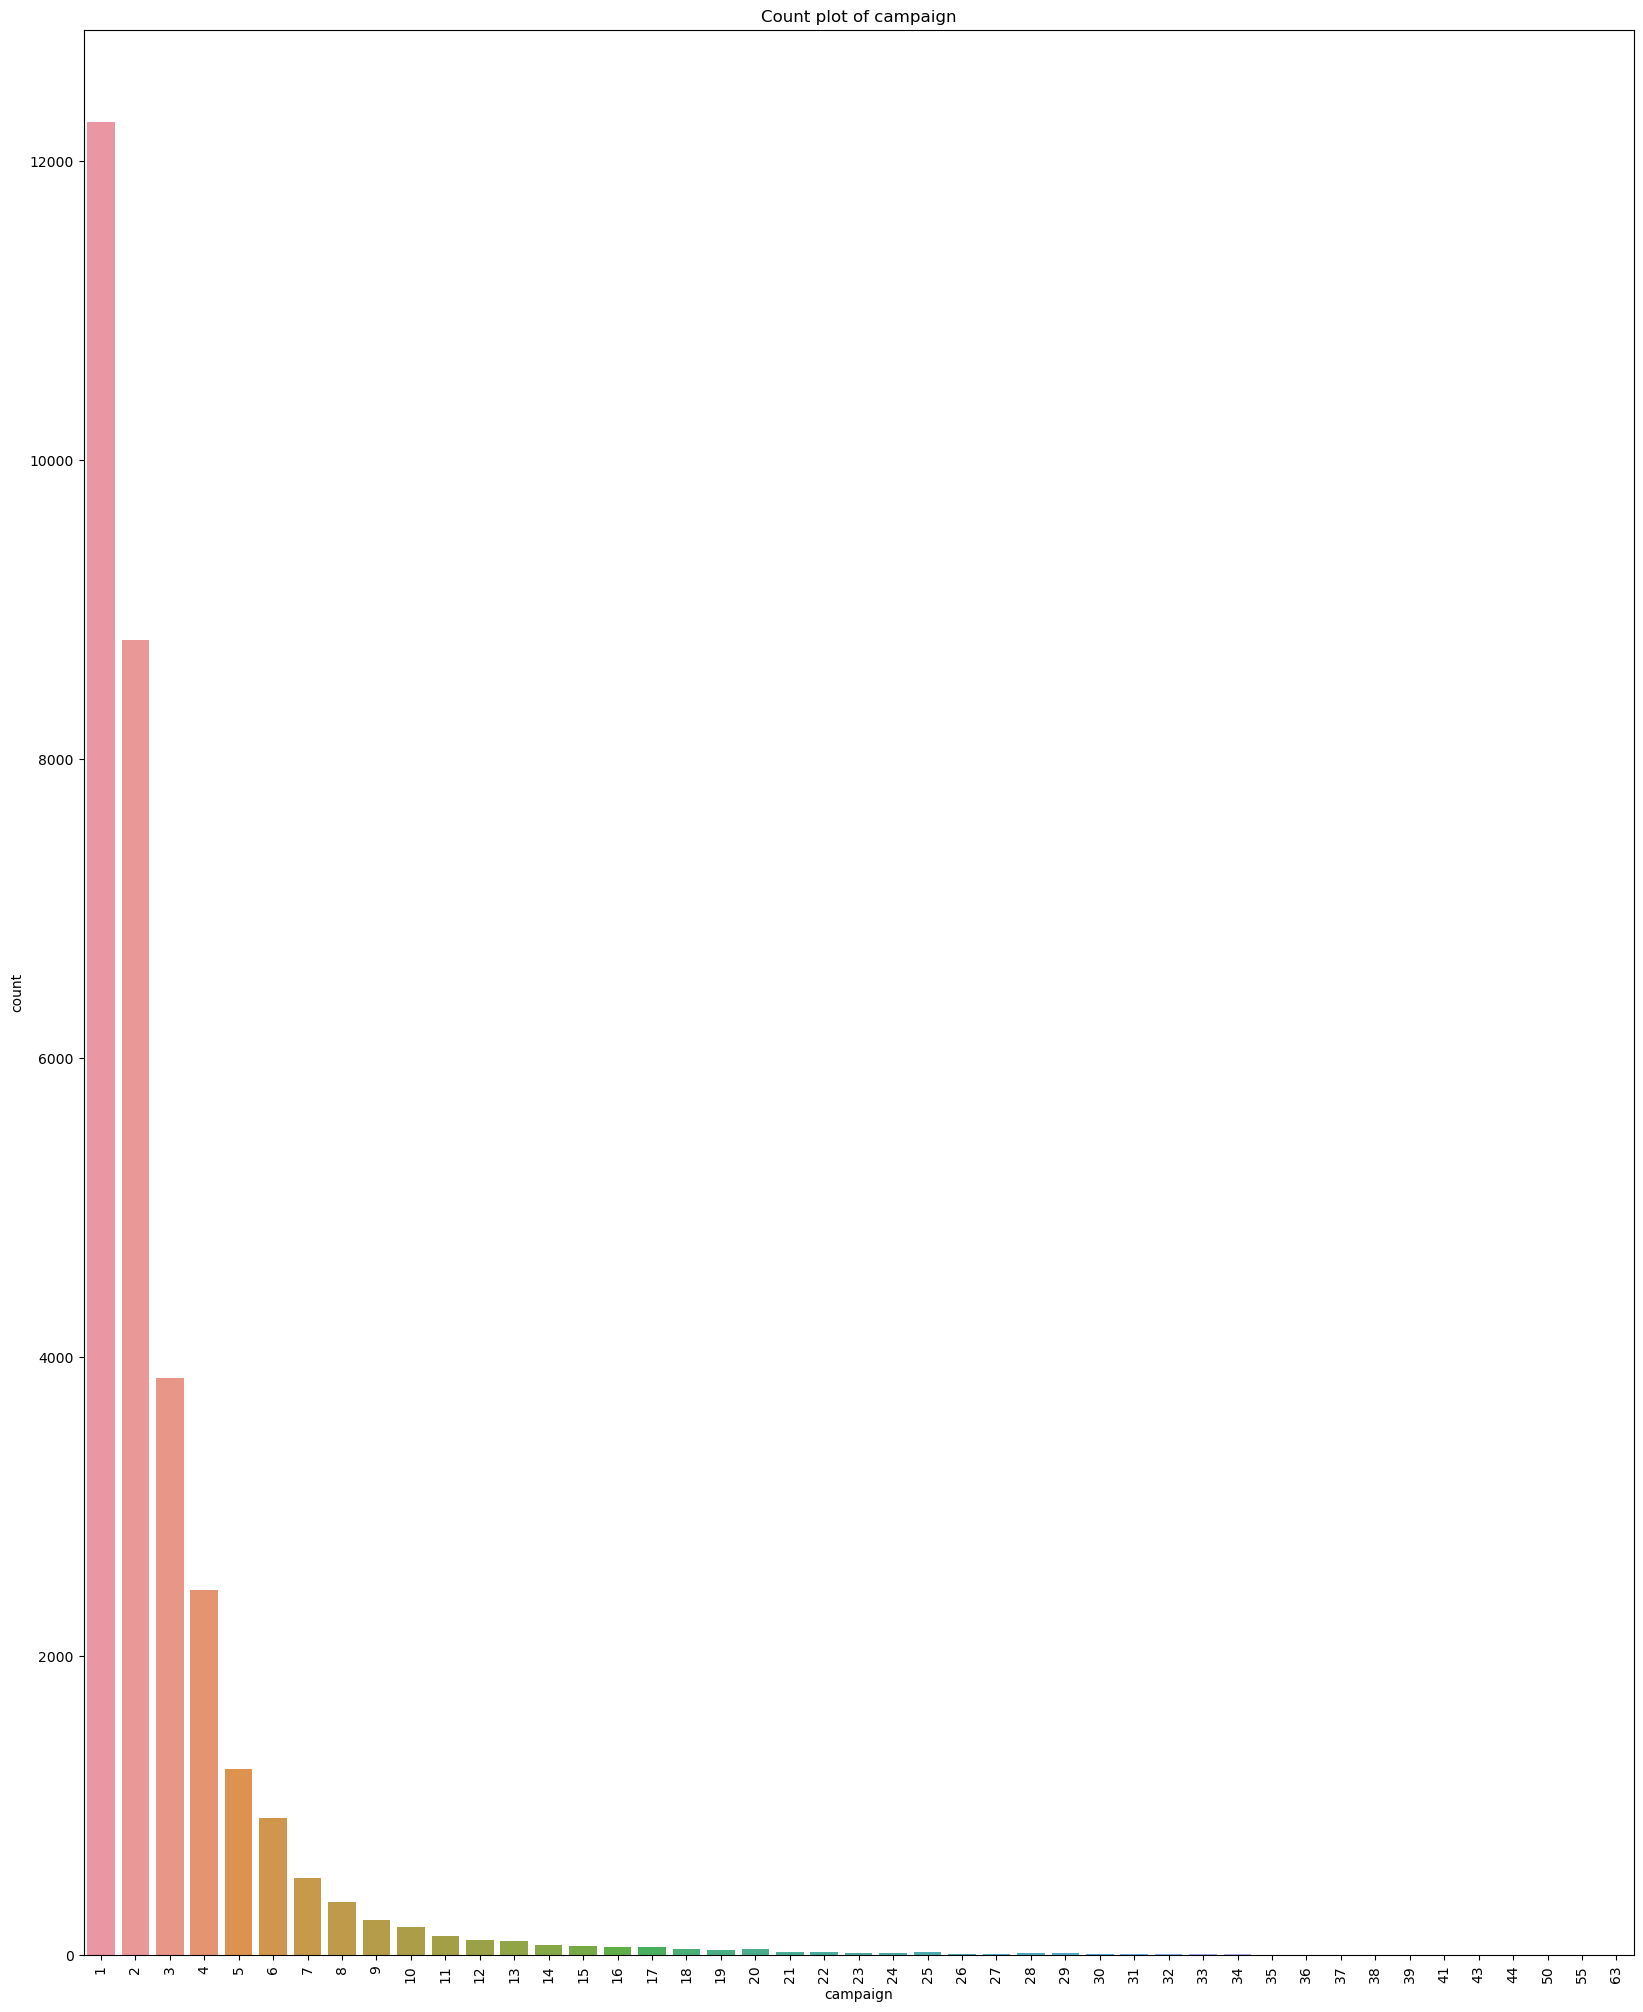

In [30]:
# Plot for 'campaign'
plt.figure(figsize=(20,25))
sns.countplot(data=df, x='campaign')
plt.title('Count plot of campaign')
plt.xticks(rotation=90)
plt.show()

The number of individuals contacted once during this campaign is the highest.

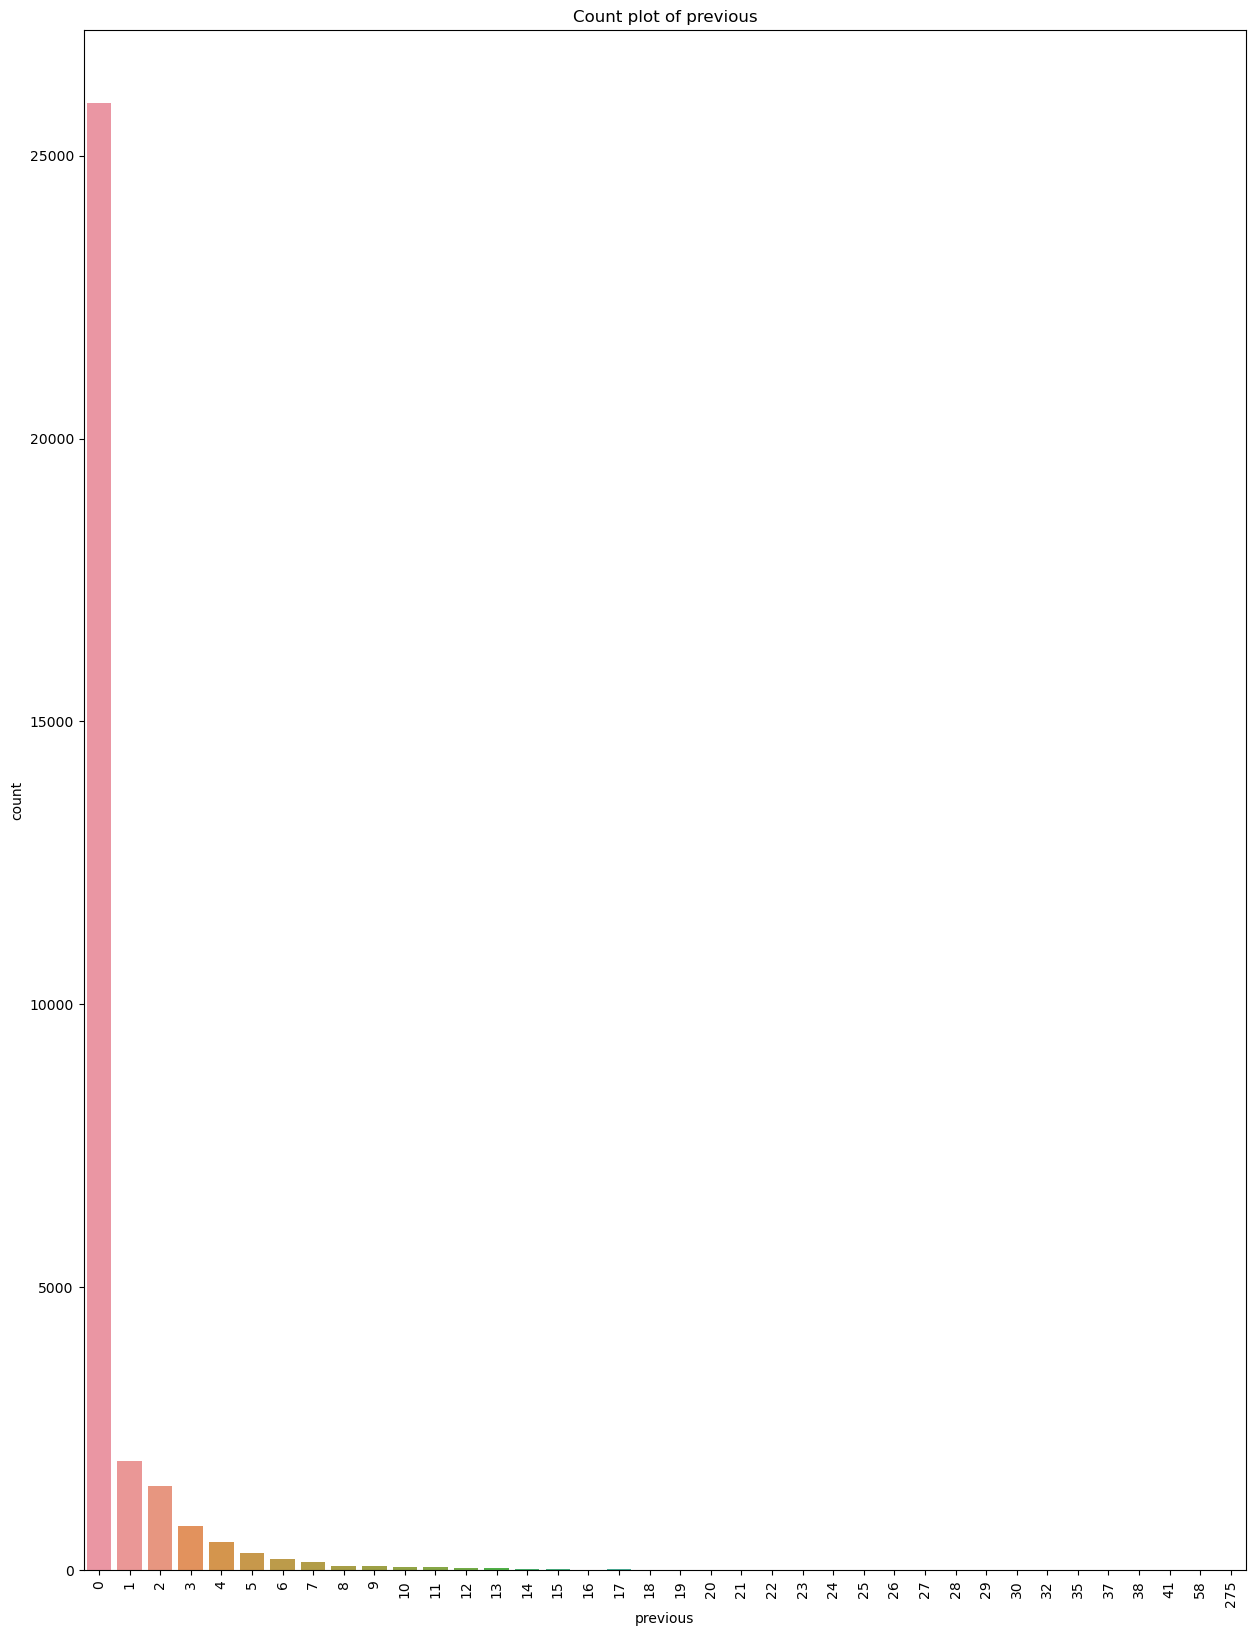

In [31]:
# Plot for 'campaign'
plt.figure(figsize=(15,20))
sns.countplot(data=df, x='previous')
plt.title('Count plot of previous')
plt.xticks(rotation=90)
plt.show()

The count of individuals contacted once before this campaign is the highest.

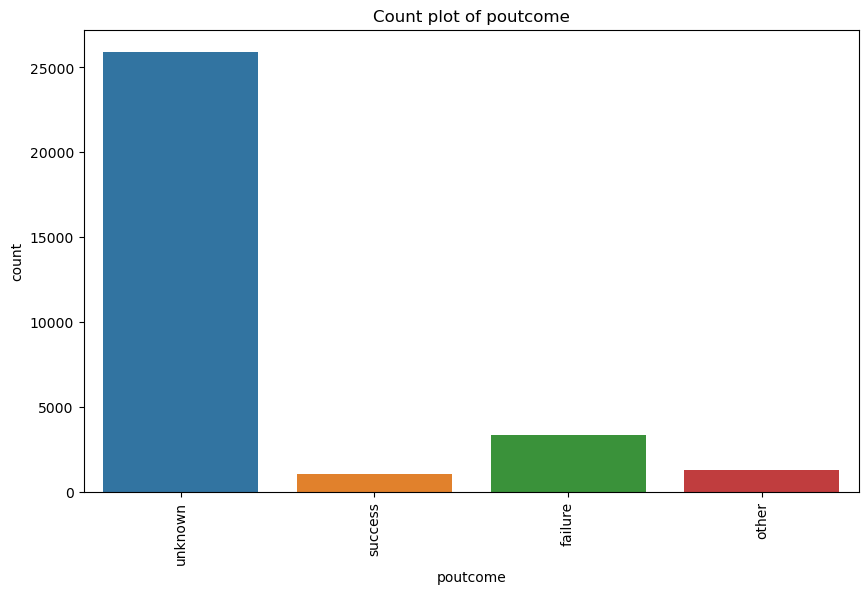

In [32]:
# Plot for 'poutcome'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='poutcome')
plt.title('Count plot of poutcome')
plt.xticks(rotation=90)
plt.show()


The count of individuals with an unknown outcome of the previous marketing campaign is the highest.

# Bivariate analysis-

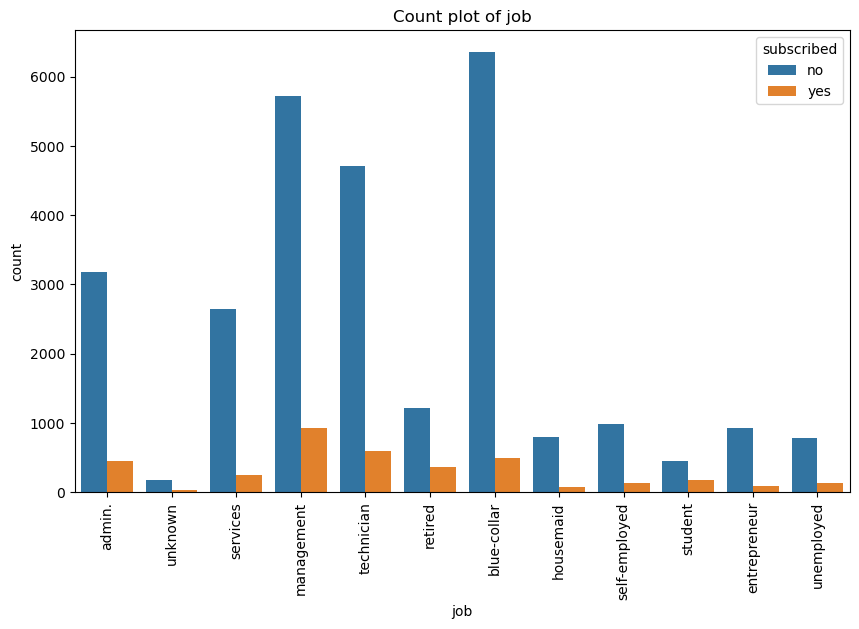

In [33]:
# Plot for 'job'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='job',hue='subscribed')
plt.title('Count plot of job')
plt.xticks(rotation=90)
plt.show()


- Individuals with blue-collar jobs are more likely to be non-subscribers of term deposits.
- Conversely, those with management positions are more likely to be subscribers of term deposits.

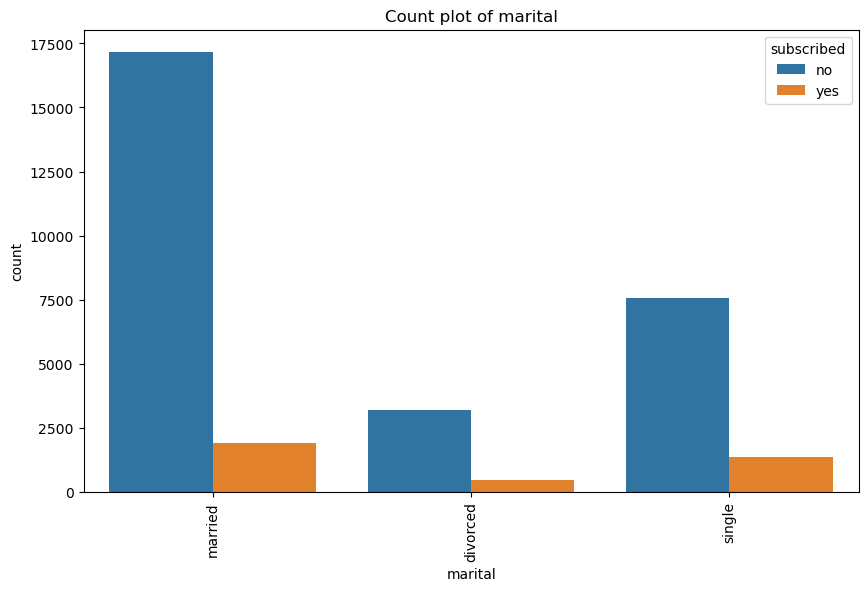

In [34]:
# Plot for 'marital'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='marital',hue='subscribed')
plt.title('Count plot of marital')
plt.xticks(rotation=90)
plt.show()


- Married individuals are most likely to be non-subscribers of term deposits.

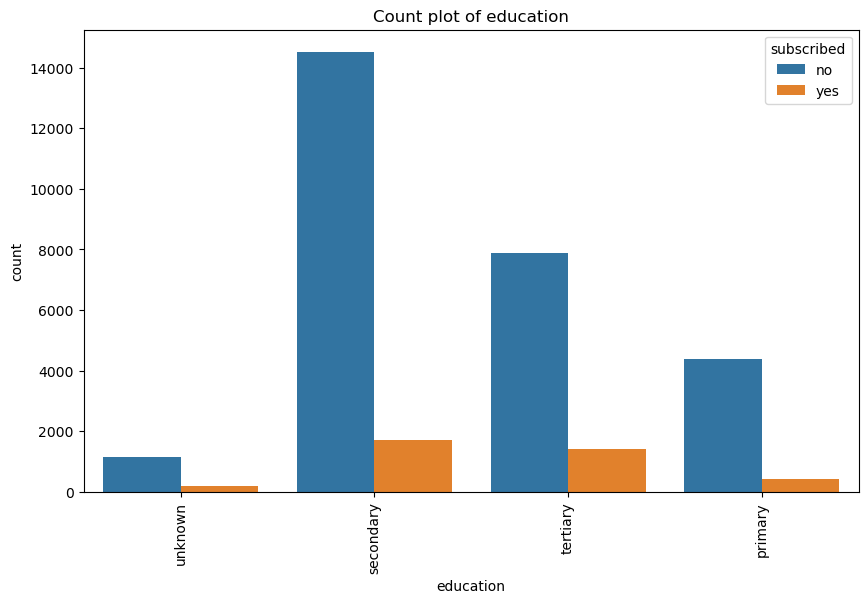

In [35]:
# Plot for 'education'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='education',hue='subscribed')
plt.title('Count plot of education')
plt.xticks(rotation=90)
plt.show()


- Individuals with secondary education have a higher likelihood of being non-subscribers of term deposits.

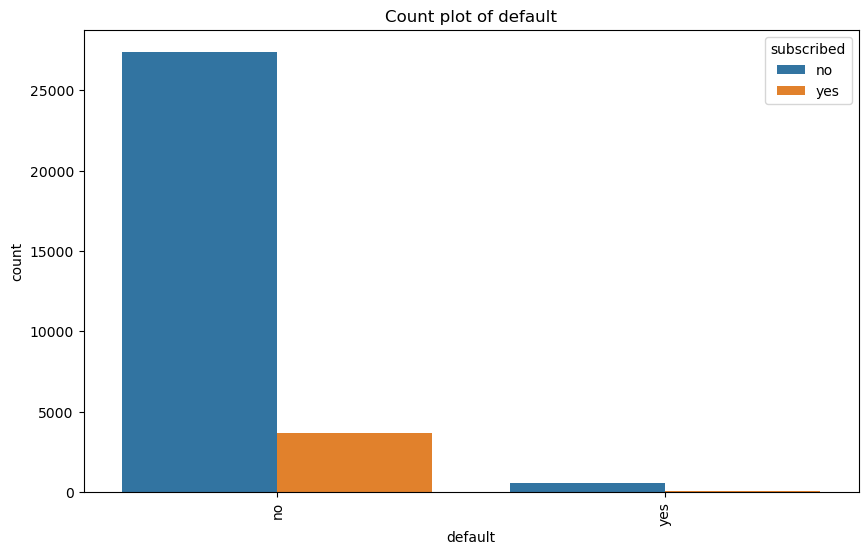

In [36]:
# Plot for 'default'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='default',hue='subscribed')
plt.title('Count plot of default')
plt.xticks(rotation=90)
plt.show()


- Individuals with no credit in default are more likely to be non-subscribers of term deposits.

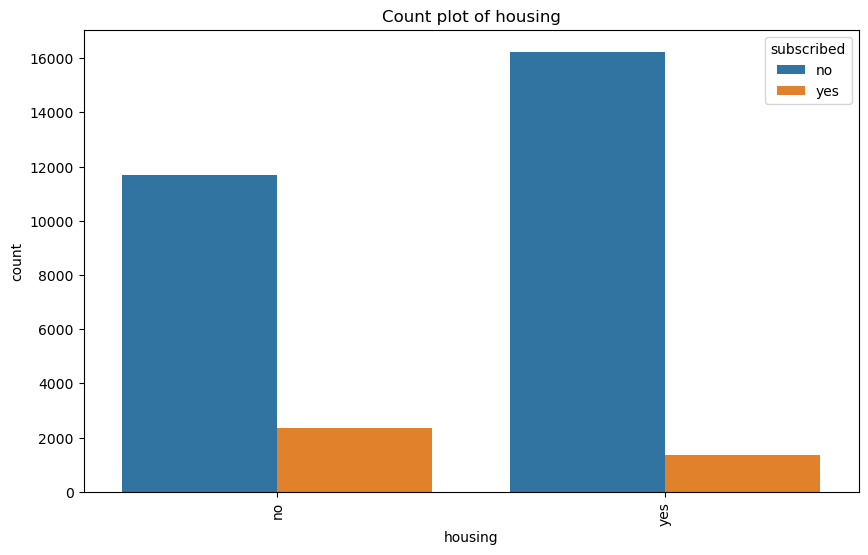

In [37]:
# Plot for 'housing'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='housing',hue='subscribed')
plt.title('Count plot of housing')
plt.xticks(rotation=90)
plt.show()


- Individuals with a housing loan are more likely to be non-subscribers of term deposits.

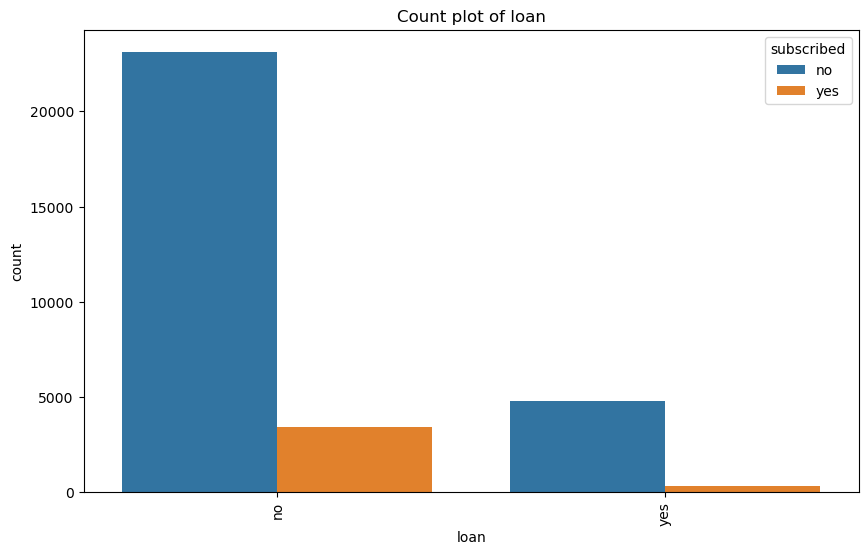

In [38]:
# Plot for 'loan'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='loan',hue='subscribed')
plt.title('Count plot of loan')
plt.xticks(rotation=90)
plt.show()


- Individuals without a personal loan are more likely to be non-subscribers of term deposits.

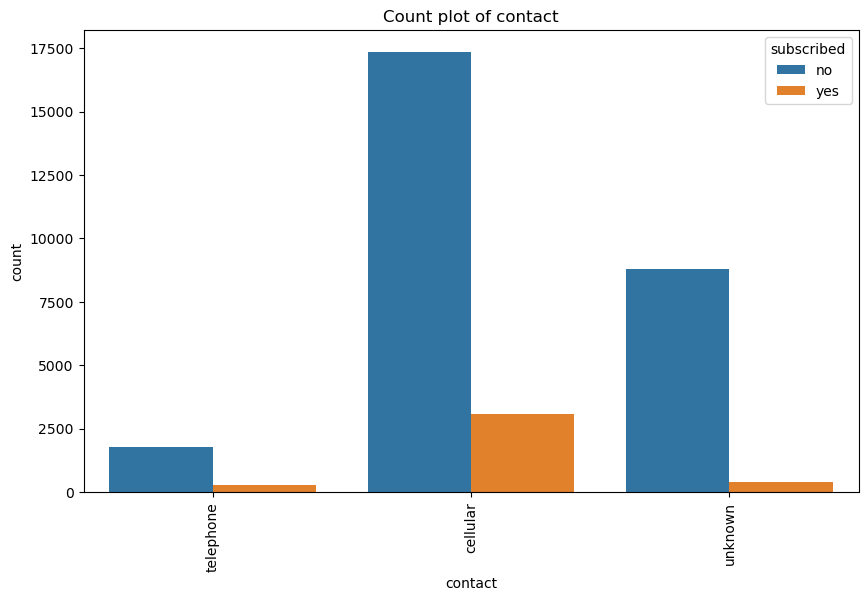

In [39]:
# Plot for 'contact'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='contact',hue='subscribed')
plt.title('Count plot of contact')
plt.xticks(rotation=90)
plt.show()


- Individuals contacted via cellular contact are more likely to be non-subscribers of term deposits.

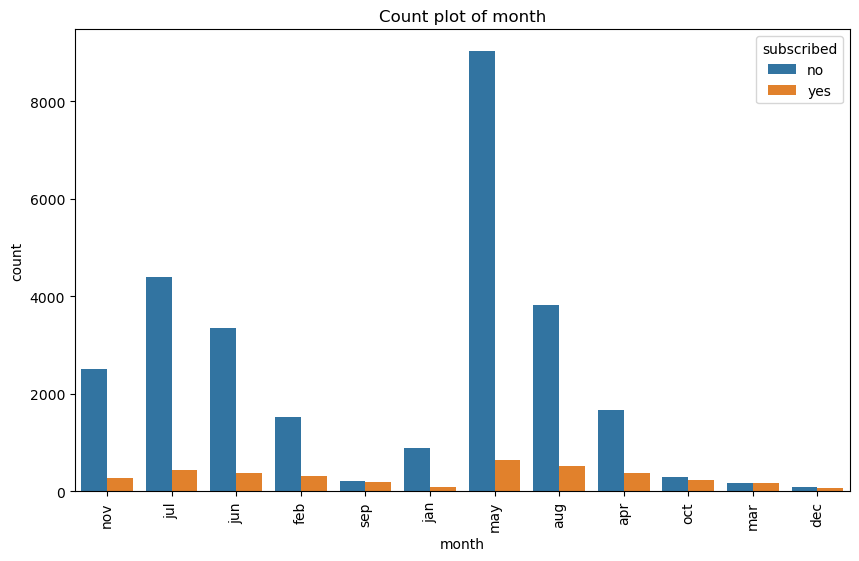

In [40]:
# Plot for 'month'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='month',hue='subscribed')
plt.title('Count plot of month')
plt.xticks(rotation=90)
plt.show()


- Individuals contacted in May are most likely to be non-subscribers of term deposits.

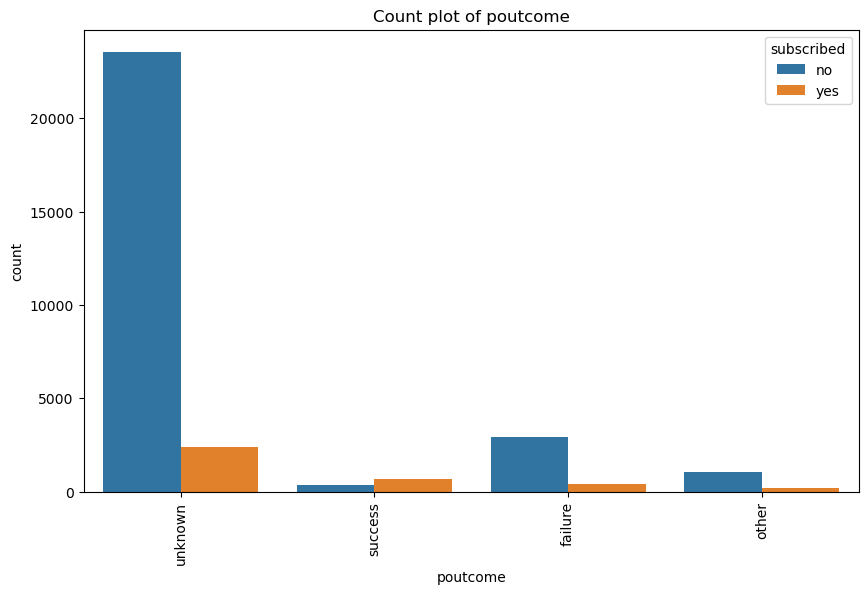

In [41]:
# Plot for 'poutcome'
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='poutcome',hue='subscribed')
plt.title('Count plot of poutcome')
plt.xticks(rotation=90)
plt.show()


- Individuals with an unknown outcome from the previous marketing campaign are most likely to be non-subscribers of term deposits.

In [42]:
months = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
          'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month'] = df['month'].map(months)


Months in the dataframe column have been converted to their numerical representation to standardize the data, making it easier for analysis and preparation for machine learning models.

In [43]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Assuming df is your DataFrame containing categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',  'poutcome', 'subscribed']

# Encode each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [44]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,56,0,1,3,0,1933,0,0,1,19,11,44,2,-1,0,3,0
1,31,11,1,1,0,3,0,0,0,20,7,91,2,-1,0,3,0
2,27,7,1,1,0,891,1,0,0,18,7,240,1,-1,0,3,0
3,57,4,0,2,0,3287,0,0,0,22,6,867,1,84,3,2,1
4,31,9,1,1,0,119,1,0,0,4,2,380,1,-1,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31642,29,4,2,2,0,0,1,0,0,12,5,116,2,-1,0,3,0
31643,53,4,0,2,0,380,0,1,0,5,6,438,2,-1,0,3,1
31644,32,4,2,2,0,312,0,0,0,7,8,37,3,-1,0,3,0
31645,57,9,1,1,0,225,1,0,1,15,5,22,7,337,12,0,0


In [45]:
df.corr()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
age,1.000000,-0.020765,-0.406024,-0.102356,-0.016117,0.103245,-0.183775,-0.012657,0.026733,-0.011056,0.098714,-0.003870,0.005733,-0.021947,0.005761,0.006466,0.024538
job,-0.020765,1.000000,0.066124,0.170347,-0.005217,0.020638,-0.125347,-0.039049,-0.078253,0.020951,0.045158,0.002694,0.001469,-0.022552,-0.003032,0.007101,0.038921
marital,-0.406024,0.066124,1.000000,0.107547,-0.009591,0.003487,-0.017846,-0.041654,-0.040180,-0.007686,-0.052429,0.011544,-0.009394,0.019741,0.012717,-0.019770,0.046043
education,-0.102356,0.170347,0.107547,1.000000,-0.006774,0.065176,-0.095376,-0.045950,-0.112000,0.017902,0.052856,0.003842,0.006142,-0.001566,0.015280,-0.019007,0.066051
default,-0.016117,-0.005217,-0.009591,-0.006774,1.000000,-0.069422,-0.011823,0.081567,0.014053,0.009996,0.014244,-0.010849,0.018538,-0.029622,-0.015877,0.035067,-0.020168
balance,0.103245,0.020638,0.003487,0.065176,-0.069422,1.000000,-0.067466,-0.083631,-0.024083,0.003461,0.095850,0.024274,-0.012032,0.001789,0.013843,-0.019629,0.050807
housing,-0.183775,-0.125347,-0.017846,-0.095376,-0.011823,-0.067466,1.000000,0.036244,0.195103,-0.025666,-0.173980,0.003021,-0.021076,0.118790,0.034231,-0.092677,-0.141092
loan,-0.012657,-0.039049,-0.041654,-0.045950,0.081567,-0.083631,0.036244,1.000000,-0.009213,0.014769,0.022717,-0.012781,0.009340,-0.020078,-0.009258,0.010919,-0.072266
contact,0.026733,-0.078253,-0.040180,-0.112000,0.014053,-0.024083,0.195103,-0.009213,1.000000,-0.027046,-0.175751,-0.016503,0.022666,-0.245076,-0.141098,0.272083,-0.150051
day,-0.011056,0.020951,-0.007686,0.017902,0.009996,0.003461,-0.025666,0.014769,-0.027046,1.000000,0.099356,-0.032288,0.159168,-0.087626,-0.048752,0.077586,-0.029600


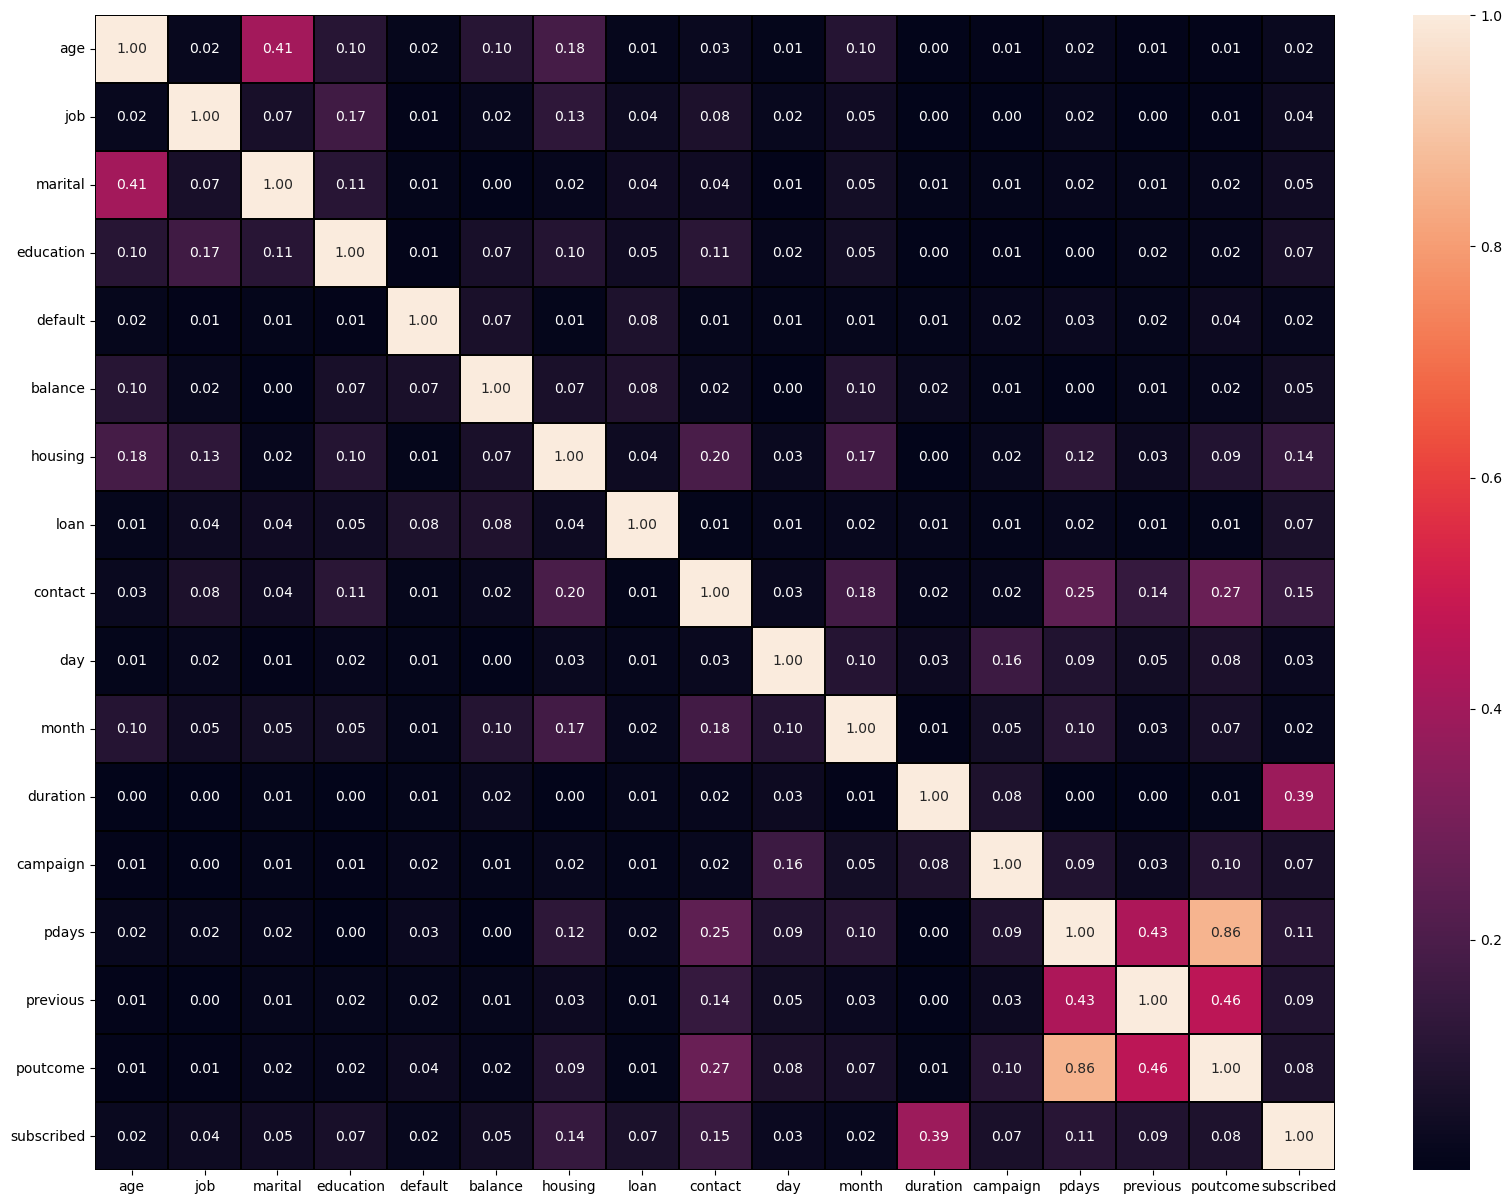

In [46]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr().abs(),annot=True,fmt='.2f',linecolor='black',linewidth=0.2)
plt.show()

Observations:

- There is a 41% correlation between age and marital status.
- A 18% correlation exists between the month and contact methods.
- There is a 39% correlation between the duration of the call and subscription status.
- A high correlation of 86% is observed between pdays (number of days since the client was last contacted) and poutcome (outcome of the previous marketing campaign), indicating multicollinearity between these features.
- A 43% correlation exists between the number of contacts performed before this previous and pdays.
- A 46% correlation is observed between the outcome of the previous marketing campaign and the number of contacts performed before this campaign.

Correlation of features with the target variable:

In [47]:
df.corr()['subscribed']

age           0.024538
job           0.038921
marital       0.046043
education     0.066051
default      -0.020168
balance       0.050807
housing      -0.141092
loan         -0.072266
contact      -0.150051
day          -0.029600
month         0.023153
duration      0.389838
campaign     -0.070607
pdays         0.108290
previous      0.088081
poutcome     -0.080895
subscribed    1.000000
Name: subscribed, dtype: float64

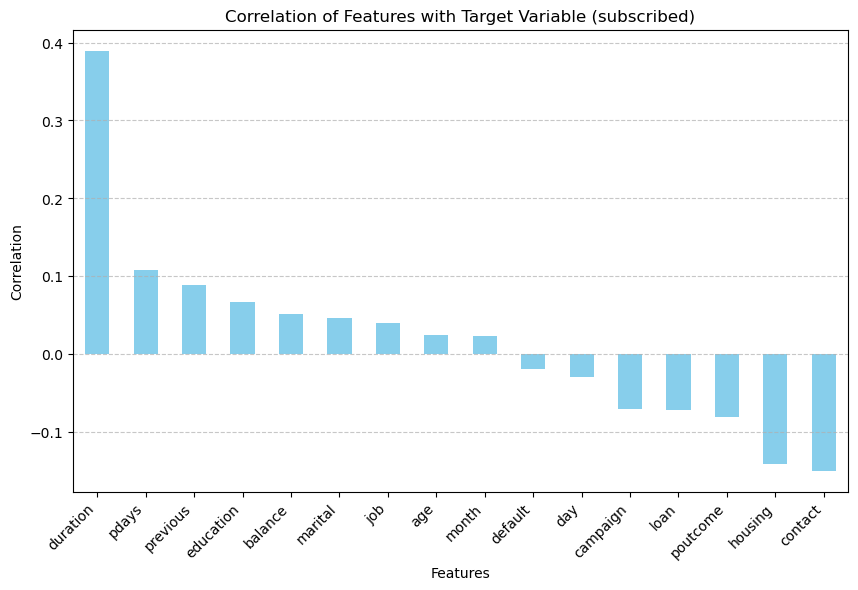

In [48]:
# Compute correlations
correlations = df.corr()['subscribed'].sort_values(ascending=False).drop(['subscribed'])

# Plot the correlations
plt.figure(figsize=(10, 6))
correlations.plot(kind='bar', color='skyblue')
plt.title('Correlation of Features with Target Variable (subscribed)')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


These correlations provide insight into how each feature is related to the target variable (`subscribed`). Here's a breakdown of the correlations:

- **Positive Correlations**:
  - `education`: 0.066051
  - `balance`: 0.050807
  - `duration`: 0.389838
  - `pdays`: 0.108290
  - `previous`: 0.088081
  
  These features have positive correlations with the target variable, indicating that as these features increase, the likelihood of a customer subscribing also increases. For example, a longer duration of the call (`duration`) or more previous contacts (`previous`) might lead to a higher chance of subscription.

- **Negative Correlations**:
  - `housing`: -0.141092
  - `loan`: -0.072266
  - `contact`: -0.150051
  - `campaign`: -0.070607
  - `poutcome`: -0.080895
  
  These features have negative correlations with the target variable, suggesting that as these features increase, the likelihood of subscription decreases. For example, having a housing loan (`housing`) or being contacted by telephone (`contact`) might decrease the chances of subscription.

- **Weak Correlations**:
  - `age`: 0.024538
  - `job`: 0.038921
  - `marital`: 0.046043
  - `default`: -0.020168
  - `day`: -0.029600
  - `month`: 0.023153
  
  These features have correlations close to zero, indicating weak linear relationships with the target variable. However, even weak correlations can still provide valuable information, especially when considered alongside other factors or in more complex models.

In [49]:
x=df[['age','balance','day','campaign','pdays','previous','poutcome','duration']]
y=df['subscribed']

# Distplot

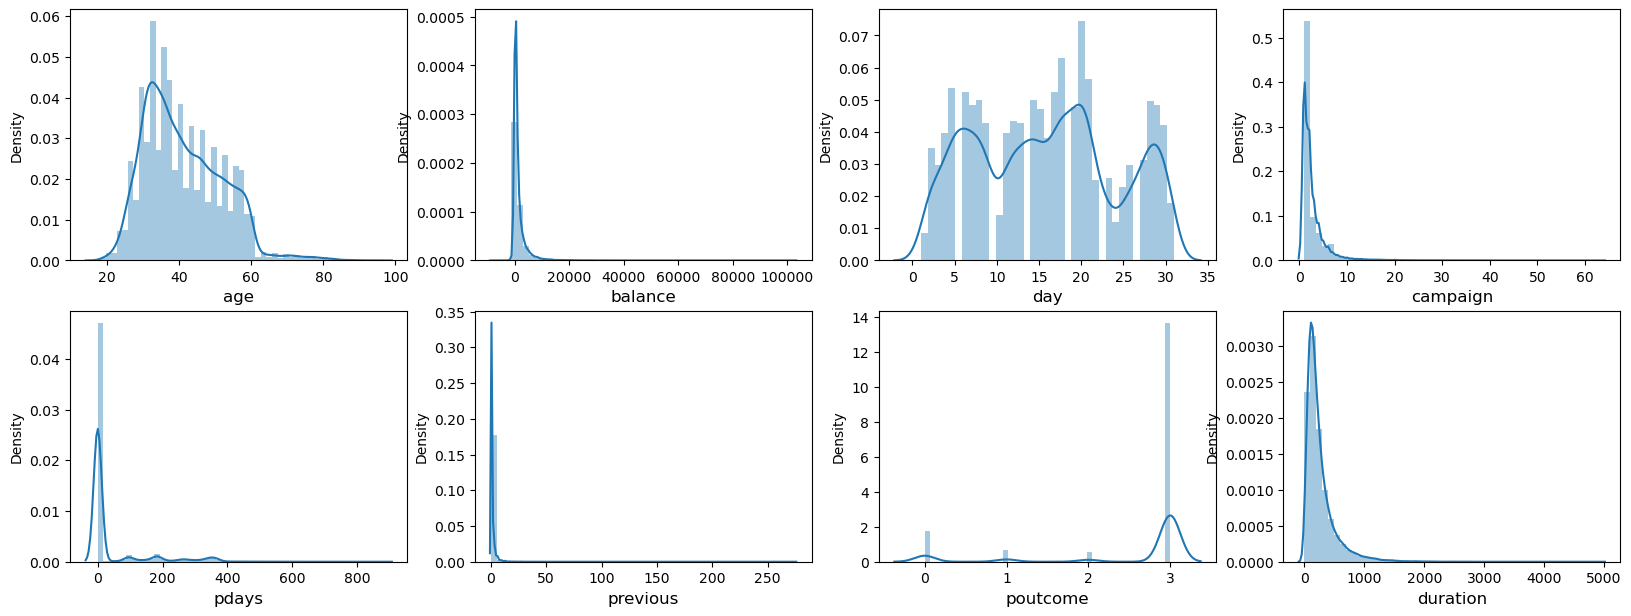

In [50]:
plt.figure(figsize=(20,15))
plotnumber=1

for col in x:
    if plotnumber<=8:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [51]:
x.skew()

age          0.681607
balance      7.995696
day          0.087185
campaign     4.873935
pdays        2.642374
previous    49.302348
poutcome    -1.996421
duration     3.199766
dtype: float64

High skewness is observed in the balance, campaign, pdays, previous, and poutcome columns.

In [52]:
# List of columns to apply cube root transformation
columns_to_transform = ['age', 'balance', 'campaign', 'pdays', 'previous', 'poutcome', 'duration']

# Apply cube root transformation to specified columns
df[columns_to_transform] = df[columns_to_transform].apply(np.cbrt)



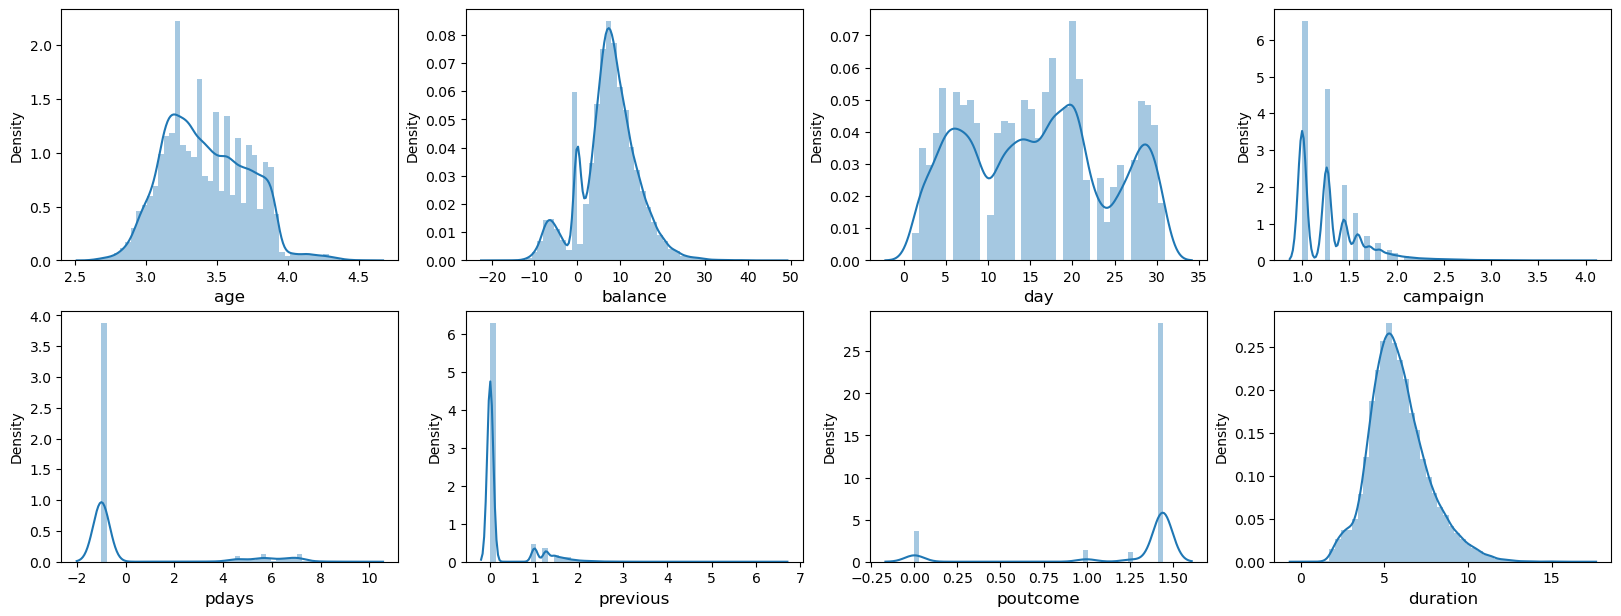

In [53]:
plt.figure(figsize=(20,15))  
plotnumber=1

for col in x.columns:
    if plotnumber<=8:
        ax=plt.subplot(4,4,plotnumber)   
        sns.distplot(df[col])  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [54]:
df.skew()

age           0.286363
job           0.264817
marital      -0.100071
education     0.199441
default       7.149903
balance      -0.086014
housing      -0.223918
loan          1.833474
contact       0.758602
day           0.087185
month         0.249339
duration      0.647275
campaign      1.667938
pdays         1.779036
previous      2.079738
poutcome     -2.386125
subscribed    2.377445
dtype: float64

The skewness in the continuous dataset has been minimized effectively.

# Boxplot

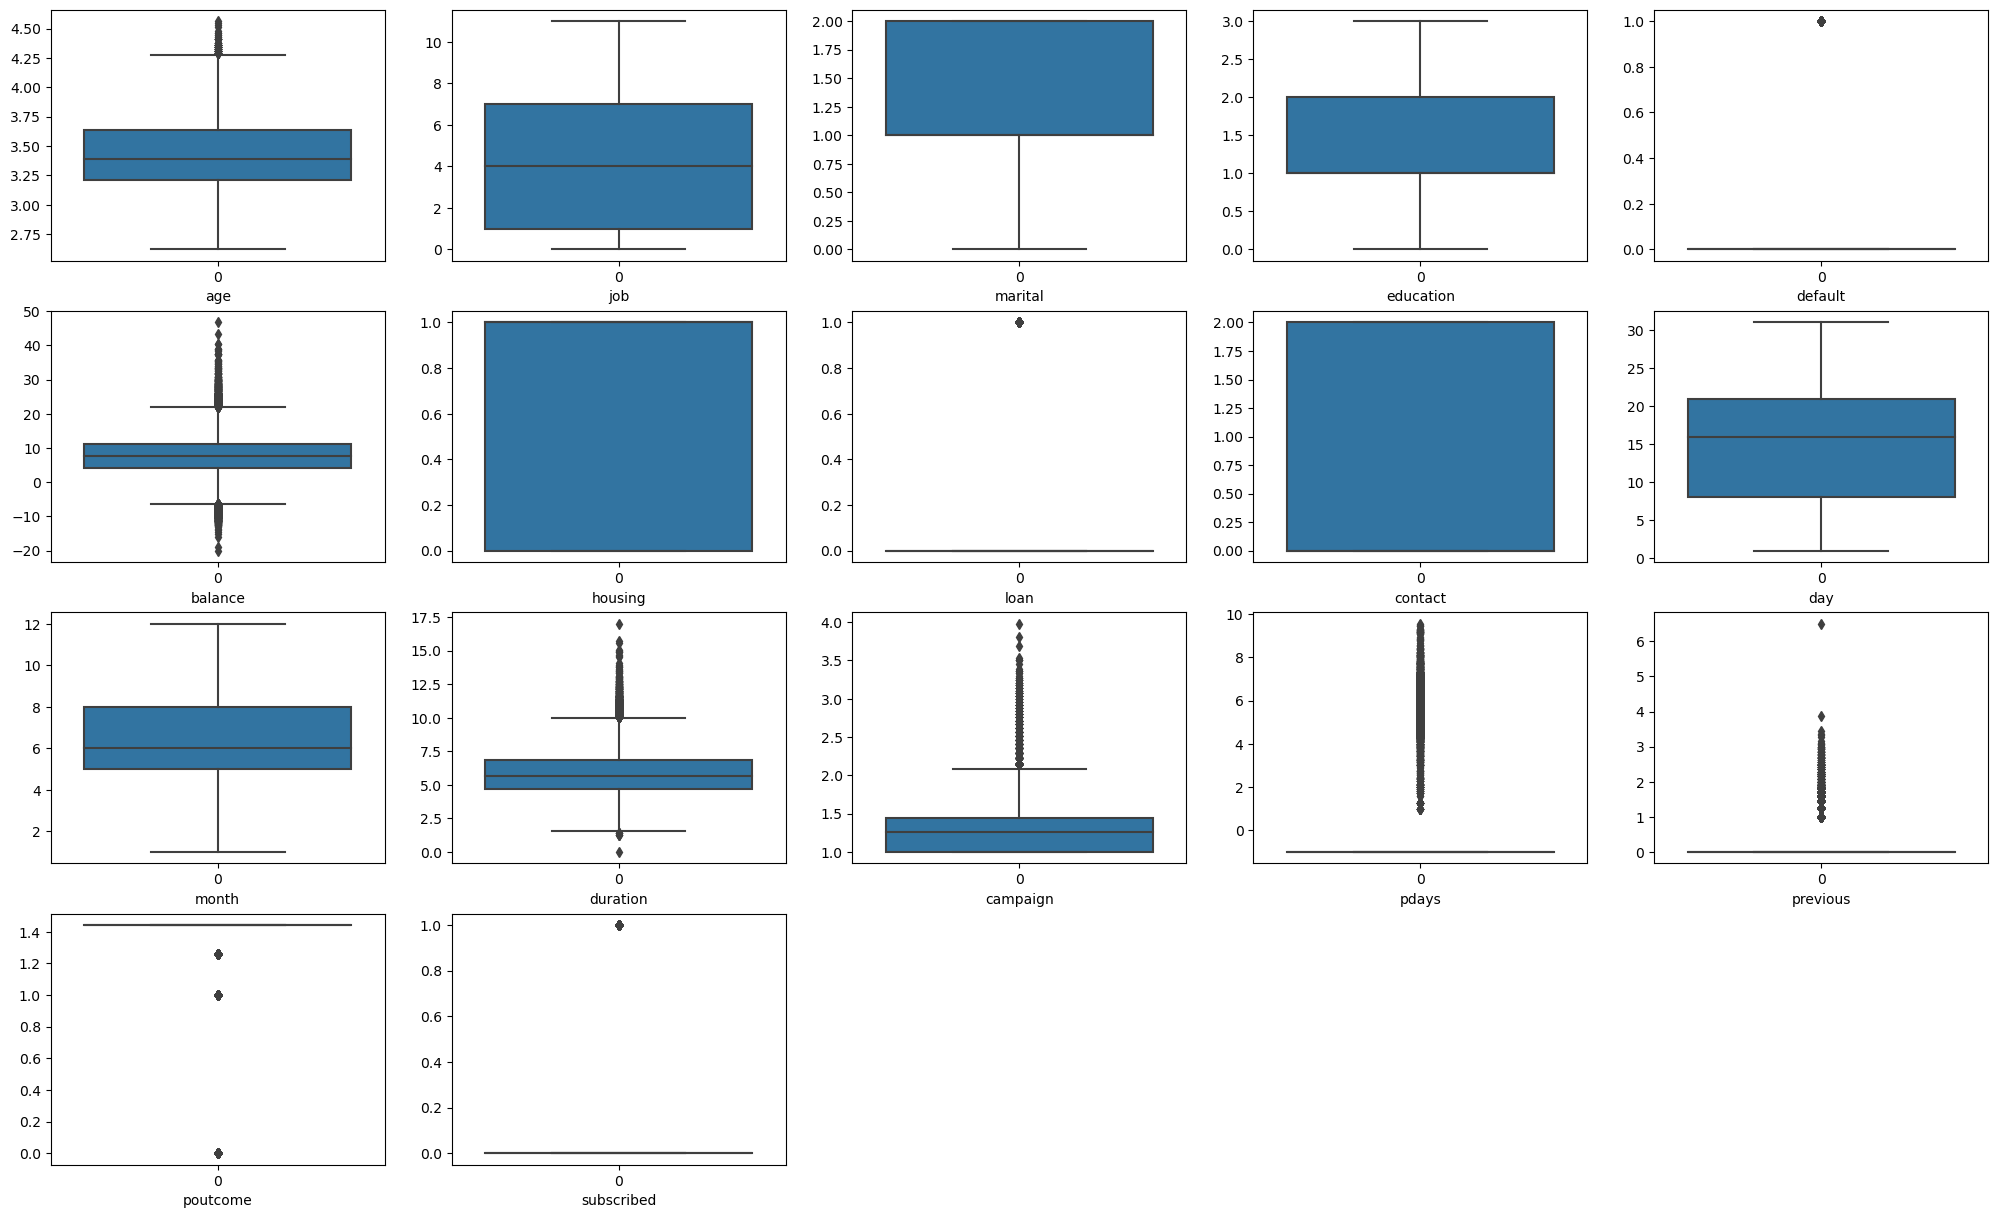

In [55]:
plt.figure(figsize=(25,15))
plotnumber=1

for i in df.columns:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(df[i],orient="v")
        plt.xlabel(i)
    plotnumber+=1
plt.show()    


In [56]:
df.nunique()

age             76
job             12
marital          3
education        4
default          2
balance       6326
housing          2
loan             2
contact          3
day             31
month           12
duration      1454
campaign        45
pdays          509
previous        38
poutcome         4
subscribed       2
dtype: int64

Outliers are evident in the columns for age, default, balance, and loan.

# Z-score method-

In [57]:
df.shape

(31647, 17)

In [58]:
z=np.abs(zscore(x))
z.shape

(31647, 8)

In [59]:
threshold=3
print(np.where(z>3))

(array([   21,    26,    36, ..., 31622, 31645, 31646], dtype=int64), array([3, 1, 4, ..., 4, 5, 7], dtype=int64))


In [60]:
df=df[(z<3).all(axis=1)]
print(df.shape)

(28124, 17)


Z-score method to remove outliers from our dataset that fall outside the acceptable range of +/-0.5 skewness value.

In [61]:
# Percentage of Data Loss

data_loss=(31647-28124)/31647*100 
# 1599 (number of rows in the original dataframe) and 1464 (number of rows after outlier removal)
data_loss

11.132176825607482

After removing the outliers, we're assessing the data loss percentage by comparing the number of rows in our original dataset with the new dataset after outlier removal. The data loss percentage should not exceed ~10 percent. but we got 11.13 percent data loss but it is considerable.

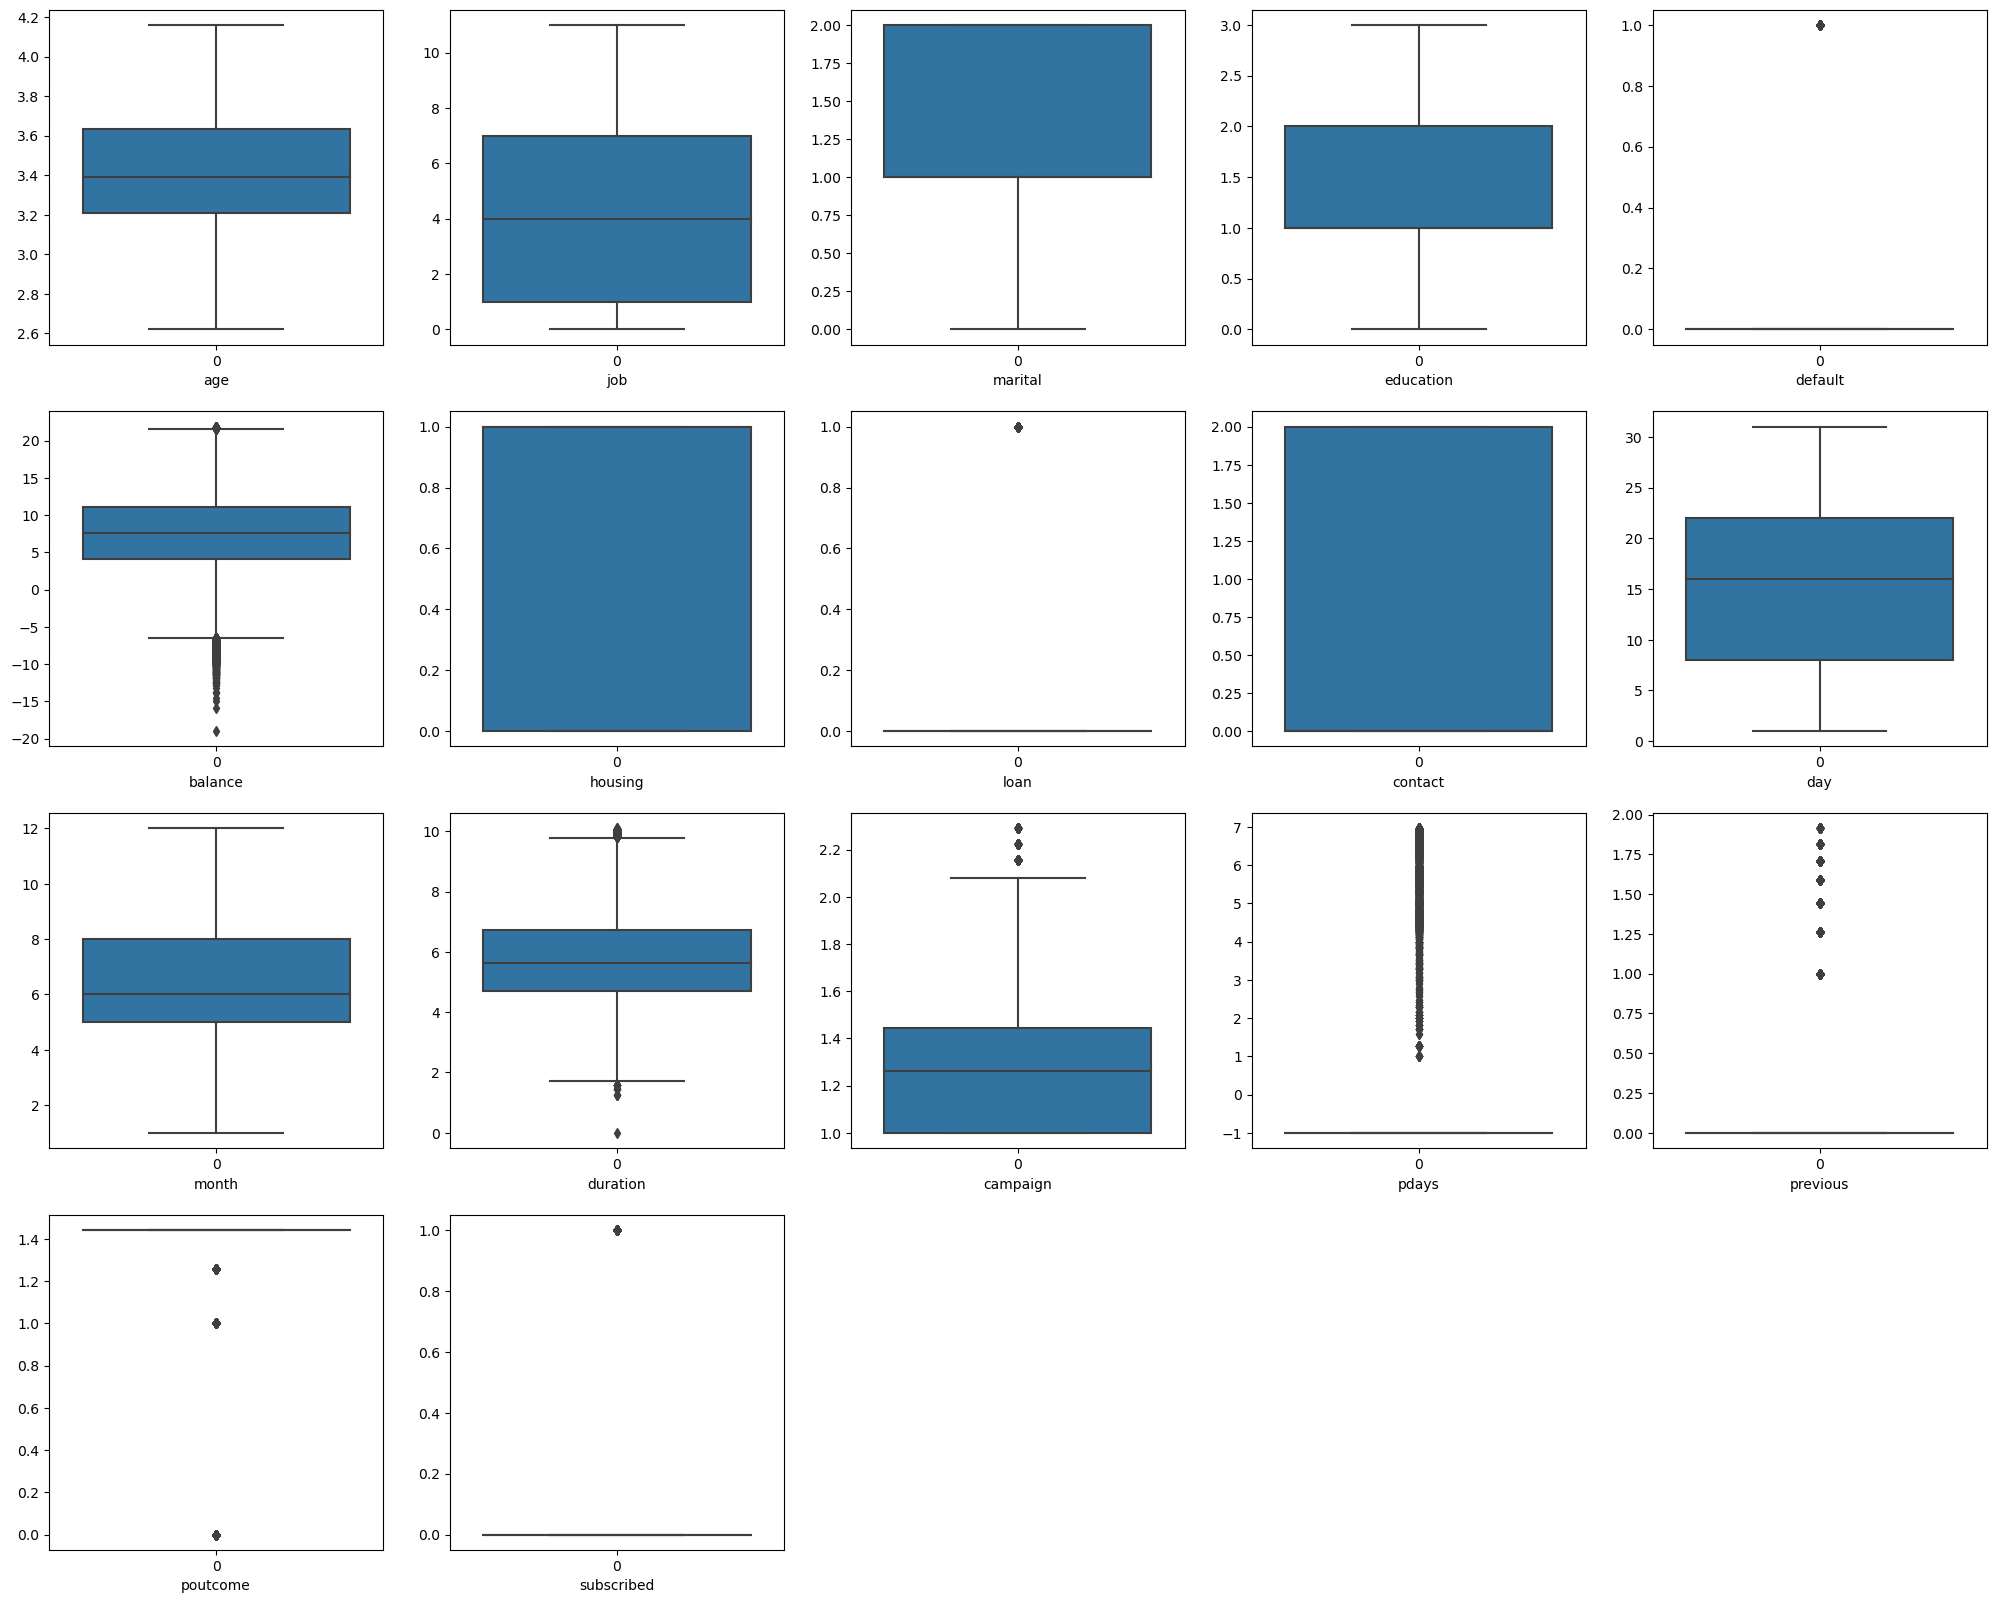

In [62]:
plt.figure(figsize=(25,20))
plotnumber=1

for i in df.columns:
    if plotnumber<=18:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(df[i],orient="v")
        plt.xlabel(i)
    plotnumber+=1
plt.show()    

In [63]:
df.corr()['subscribed']

age          -0.019430
job           0.036743
marital       0.056387
education     0.075838
default      -0.014500
balance       0.094746
housing      -0.145640
loan         -0.074803
contact      -0.158031
day          -0.030122
month         0.018534
duration      0.328075
campaign     -0.081699
pdays         0.167936
previous      0.189480
poutcome     -0.048104
subscribed    1.000000
Name: subscribed, dtype: float64

- Balance, loan, pdays, and default columns exhibit minimal correlation with the target variable and contain numerous outliers.
- Age, day, month, poutcome, and job columns also show very low correlation with the target variable.
- Considering their limited relevance to predicting the target variable, these columns can be dropped from the dataset.

In [64]:
df=df.drop(columns=['balance','loan','default','day','month','poutcome','age','campaign','poutcome'])
df

,job,marital,education,housing,contact,duration,pdays,previous,subscribed
0,0,1,3,0,1,3.530348,-1.000000,0.00000,0
1,11,1,1,0,0,4.497941,-1.000000,0.00000,0
2,7,1,1,1,0,6.214465,-1.000000,0.00000,0
3,4,0,2,0,0,9.535417,4.379519,1.44225,1
4,9,1,1,1,0,7.243156,-1.000000,0.00000,0
...,...,...,...,...,...,...,...,...,...
31640,4,2,1,0,2,3.107233,-1.000000,0.00000,0
31641,9,2,2,0,2,7.617412,-1.000000,0.00000,0
31642,4,2,2,1,0,4.876999,-1.000000,0.00000,0
31643,4,0,2,0,0,7.594363,-1.000000,0.00000,1


In [65]:
df.corr()['subscribed']

job           0.036743
marital       0.056387
education     0.075838
housing      -0.145640
contact      -0.158031
duration      0.328075
pdays         0.167936
previous      0.189480
subscribed    1.000000
Name: subscribed, dtype: float64

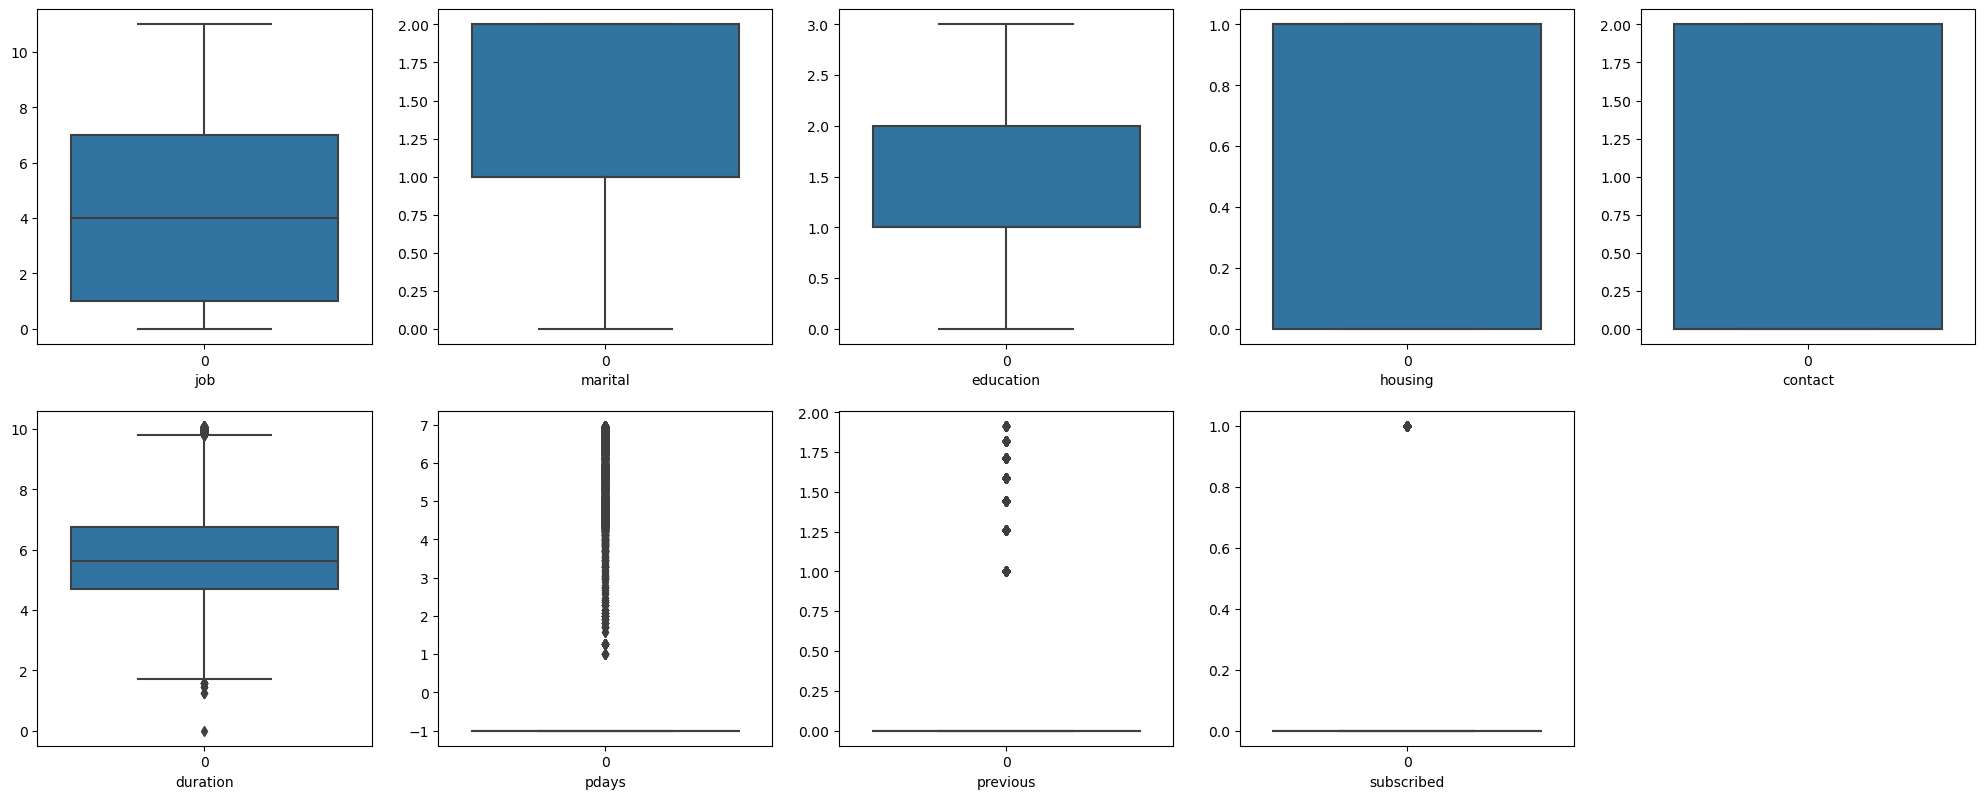

In [66]:
plt.figure(figsize=(25,20))
plotnumber=1

for i in df.columns:
    if plotnumber<=10:
        ax=plt.subplot(4,5,plotnumber)
        sns.boxplot(df[i],orient="v")
        plt.xlabel(i)
    plotnumber+=1
plt.show()  

Here we observe that outliers have been mostly removed from the dataset. However, the "previous" column still contains outliers. Since "previous" is a categorical column, we are not concerned about outliers in this context.

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['VIF Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features']=x.columns
vif

,VIF Values,Features
0,11.589038,age
1,1.217249,balance
2,4.446337,day
3,1.857733,campaign
4,2.296522,pdays
5,1.315419,previous
6,11.889558,poutcome
7,1.989901,duration


There doesn't appear to be any significant multicollinearity among the features.

In [68]:
df.corr()['subscribed']

job           0.036743
marital       0.056387
education     0.075838
housing      -0.145640
contact      -0.158031
duration      0.328075
pdays         0.167936
previous      0.189480
subscribed    1.000000
Name: subscribed, dtype: float64

# Preparing Data for Machine Learning

# Splitting

Choose the dependent(label)and independent variables.

In [69]:
X = df.drop('subscribed', axis=1)
Y = df['subscribed']

I've split the dataset into features and labels, with X representing all the feature columns and Y representing the target label column.

# Taking care of class imbalance

In [70]:
Y.value_counts()

subscribed
0    25264
1     2860
Name: count, dtype: int64

I'm listing the values in our label column to count the number of rows for each category. This will show if there's class imbalance, which we'll address using oversampling.

In [71]:
# We're adding samples to ensure an equal number of instances for all categorical quality values.
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

We're employing the SMOTE oversampling method to balance the distribution of categories within our target label, ensuring each category has an equal number of instances.

In [72]:
Y.value_counts()

subscribed
0    25264
1    25264
Name: count, dtype: int64

Now, we can observe that we have successfully addressed the class imbalance issue, with all categories having the same amount of data.

In [73]:
Y # Displaying just the label

0        0
1        0
2        0
3        1
4        0
        ..
50523    1
50524    1
50525    1
50526    1
50527    1
Name: subscribed, Length: 50528, dtype: int32

In [74]:
X 

,job,marital,education,housing,contact,duration,pdays,previous
0,0,1,3,0,1,3.530348,-1.000000,0.000000
1,11,1,1,0,0,4.497941,-1.000000,0.000000
2,7,1,1,1,0,6.214465,-1.000000,0.000000
3,4,0,2,0,0,9.535417,4.379519,1.442250
4,9,1,1,1,0,7.243156,-1.000000,0.000000
...,...,...,...,...,...,...,...,...
50523,9,0,1,0,0,8.153117,-1.000000,0.000000
50524,4,2,2,0,0,6.629102,5.405348,1.668044
50525,4,2,2,1,0,4.164170,-1.000000,0.000000
50526,6,1,2,0,0,5.543302,5.694009,1.501394


# Feature Scaling

In [75]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
X 

,job,marital,education,housing,contact,duration,pdays,previous
0,-1.376471,-0.317380,2.379705,-0.87601,0.663993,-1.721850,-0.532417,-0.526822
1,2.010385,-0.317380,-0.377880,-0.87601,-0.565584,-1.151394,-0.532417,-0.526822
2,0.778801,-0.317380,-0.377880,1.14154,-0.565584,-0.139398,-0.532417,-0.526822
3,-0.144887,-1.916557,1.000912,-0.87601,-0.565584,1.818507,1.493399,2.034255
4,1.394593,-0.317380,-0.377880,1.14154,-0.565584,0.467078,-0.532417,-0.526822
...,...,...,...,...,...,...,...,...
50523,1.394593,-1.916557,-0.377880,-0.87601,-0.565584,1.003556,-0.532417,-0.526822
50524,-0.144887,1.281798,1.000912,-0.87601,-0.565584,0.105056,1.879704,2.435210
50525,-0.144887,1.281798,1.000912,1.14154,-0.565584,-1.348173,-0.532417,-0.526822
50526,0.470905,-0.317380,1.000912,-0.87601,-0.565584,-0.535090,1.988408,2.139280


To address potential bias stemming from variations in decimal places across feature columns, I've opted to standardize all the features using the Standard Scaler method. This technique ensures that all feature columns have comparable scales, which can enhance the performance and stability of my model.

# Creating the training and testing data sets

In [85]:
maxacc=0
maxrs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=i) 
    rf=RandomForestClassifier()
    rf.fit(x_train,y_train)
    pred=rf.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxacc:
        maxacc=acc
        maxrs=i
print('Best accuracy is', maxacc,'at random state',maxrs) 

Best accuracy is 0.9076355976829911 at random state 55


In [78]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)

20% of the dataset will be used for testing, and the remaining 80% for training our machine learning models.

In [80]:
# Display the shape of the resulting sets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", Y_train.shape)
print("y_test shape:", Y_test.shape)

X_train shape: (40422, 8)
X_test shape: (10106, 8)
y_train shape: (40422,)
y_test shape: (10106,)


# Machine Learning Model for Classification and Evaluation Metrics

In [82]:
# Classification Model Function
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,accuracy_score
def classify(model, X, Y):
    print('Model Name:-',model)
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=maxrs)
    
    # Training the model
    model.fit(X_train, Y_train)
    
    # Predicting Y_test
    pred = model.predict(X_test)
    
    # Accuracy Score
    acc_score = (accuracy_score(Y_test, pred))*100
    print("Accuracy Score:", acc_score)
    
    # Classification Report
    class_report = classification_report(Y_test, pred)
    print("\nClassification Report:\n", class_report)
    
    #Confusion Matrix
    confusion_matx=confusion_matrix(Y_test, pred)
    print("\nConfusion Matrix:\n",confusion_matx)
    
    # Cross Validation Score
    cv_score = (cross_val_score(model, X, Y, cv=5).mean())*100
    print("\nCross Validation Score:", cv_score)
    
    # Result of accuracy minus cv scores
    result = acc_score - cv_score
    print("\nAccuracy Score - Cross Validation Score is", result)

I've created a class to handle train-test splitting, model training, label prediction, accuracy score calculation, classification report generation, cross-validation scoring,Confusion Matrix, and comparison of accuracy and cross-validation scores for any machine learning model that utilizes this function.

In [90]:
# Logistic Regression

model=LogisticRegression()
classify(model, X, Y)

Model Name:- LogisticRegression()
Accuracy Score: 80.09103502869583

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.79      0.80      5100
           1       0.79      0.82      0.80      5006

    accuracy                           0.80     10106
   macro avg       0.80      0.80      0.80     10106
weighted avg       0.80      0.80      0.80     10106


Confusion Matrix:
 [[4009 1091]
 [ 921 4085]]

Cross Validation Score: 79.5836121280679

Accuracy Score - Cross Validation Score is 0.5074229006279296


In [91]:
# Extra Trees Classifier

model=ExtraTreesClassifier()
classify(model, X, Y)

Model Name:- ExtraTreesClassifier()
Accuracy Score: 85.5729269740748

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.85      0.86      5100
           1       0.85      0.87      0.86      5006

    accuracy                           0.86     10106
   macro avg       0.86      0.86      0.86     10106
weighted avg       0.86      0.86      0.86     10106


Confusion Matrix:
 [[4314  786]
 [ 672 4334]]

Cross Validation Score: 85.1864533813913

Accuracy Score - Cross Validation Score is 0.386473592683501


In [92]:
# Support Vector Classifier

model=SVC(C=1.0, kernel='rbf', gamma='auto', random_state=42)
classify(model, X, Y)

Model Name:- SVC(gamma='auto', random_state=42)
Accuracy Score: 82.08984761527806

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.76      0.81      5100
           1       0.78      0.88      0.83      5006

    accuracy                           0.82     10106
   macro avg       0.83      0.82      0.82     10106
weighted avg       0.83      0.82      0.82     10106


Confusion Matrix:
 [[3874 1226]
 [ 584 4422]]

Cross Validation Score: 81.77250251735366

Accuracy Score - Cross Validation Score is 0.31734509792440235


In [93]:
# Random Forest Classifier

model=RandomForestClassifier(max_depth=15, random_state=111)
classify(model, X, Y)

Model Name:- RandomForestClassifier(max_depth=15, random_state=111)
Accuracy Score: 86.32495547199683

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.82      0.86      5100
           1       0.83      0.91      0.87      5006

    accuracy                           0.86     10106
   macro avg       0.87      0.86      0.86     10106
weighted avg       0.87      0.86      0.86     10106


Confusion Matrix:
 [[4161  939]
 [ 443 4563]]

Cross Validation Score: 85.94048832009594

Accuracy Score - Cross Validation Score is 0.38446715190089265


In [94]:
# K Neighbors Classifier

model=KNeighborsClassifier(n_neighbors=15)
classify(model, X, Y)

Model Name:- KNeighborsClassifier(n_neighbors=15)
Accuracy Score: 84.07876509004552

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.77      0.83      5100
           1       0.80      0.91      0.85      5006

    accuracy                           0.84     10106
   macro avg       0.85      0.84      0.84     10106
weighted avg       0.85      0.84      0.84     10106


Confusion Matrix:
 [[3931 1169]
 [ 440 4566]]

Cross Validation Score: 83.72190985352394

Accuracy Score - Cross Validation Score is 0.35685523652158224


In [95]:
# Decision Tree Classifier

model=DecisionTreeClassifier(random_state=21, max_depth=15)
classify(model, X, Y)

Model Name:- DecisionTreeClassifier(max_depth=15, random_state=21)
Accuracy Score: 83.14862457945776

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.80      0.83      5100
           1       0.81      0.87      0.84      5006

    accuracy                           0.83     10106
   macro avg       0.83      0.83      0.83     10106
weighted avg       0.83      0.83      0.83     10106


Confusion Matrix:
 [[4058 1042]
 [ 661 4345]]

Cross Validation Score: 83.27266746852487

Accuracy Score - Cross Validation Score is -0.12404288906711258


In [96]:
# XGB Classifier

model=xgb.XGBClassifier(verbosity=0)
classify(model, X, Y)

Model Name:- XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy Score: 85.0880664951514

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.82      0.85      5100
           1       0.83      0.88      0.85      5006

    acc

# summary of the metrics for each model:

1. **Logistic Regression**:
   - Accuracy Score: 80.09%
   - Cross Validation Score: 79.58%
   - Accuracy Score - Cross Validation Score: 0.51%

2. **Extra Trees Classifier**:
   - Accuracy Score: 85.57%
   - Cross Validation Score: 85.19%
   - Accuracy Score - Cross Validation Score: 0.39%

3. **Support Vector Classifier (SVC)**:
   - Accuracy Score: 82.09%
   - Cross Validation Score: 81.77%
   - Accuracy Score - Cross Validation Score: 0.32%

4. **Random Forest Classifier**:
   - Accuracy Score: 86.32%
   - Cross Validation Score: 85.94%
   - Accuracy Score - Cross Validation Score: 0.38%

5. **K Neighbors Classifier**:
   - Accuracy Score: 84.08%
   - Cross Validation Score: 83.72%
   - Accuracy Score - Cross Validation Score: 0.36%

6. **Decision Tree Classifier**:
   - Accuracy Score: 83.15%
   - Cross Validation Score: 83.27%
   - Accuracy Score - Cross Validation Score: -0.12%

7. **XGBoost Classifier**:
   - Accuracy Score: 85.09%
   - Cross Validation Score: 84.01%
   - Accuracy Score - Cross Validation Score: 1.08%

Overall, the models performed well with varying degrees of accuracy. The Random Forest Classifier had the highest accuracy score at 86.32%, followed closely by the Extra Trees Classifier at 85.57%. However, when considering the difference between accuracy and cross-validation scores, the Random Forest Classifier appears to be slightly more stable, with a difference of 0.38%.

# Hyper parameter tuning on the best ML Model

In [84]:
from sklearn.model_selection import GridSearchCV

In [85]:
# ExtraTrees Classifier
from sklearn.model_selection import GridSearchCV

parameters={
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


In [86]:
GCV=GridSearchCV(RandomForestClassifier(),parameters,cv=5)

In [87]:
GCV.fit(X_train,Y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]})

In [88]:
GCV.best_params_

{'max_depth': 20,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [89]:
final_model_2=RandomForestClassifier(max_depth=20,min_samples_leaf=1,min_samples_split=5,n_estimators=100,random_state=maxrs)
final_model_2.fit(X_train,Y_train)
pred=final_model_2.predict(X_test)
acc=accuracy_score(Y_test,pred)
print(acc*100)

86.47338214921828


# Plotting ROC and AUC for all the models used

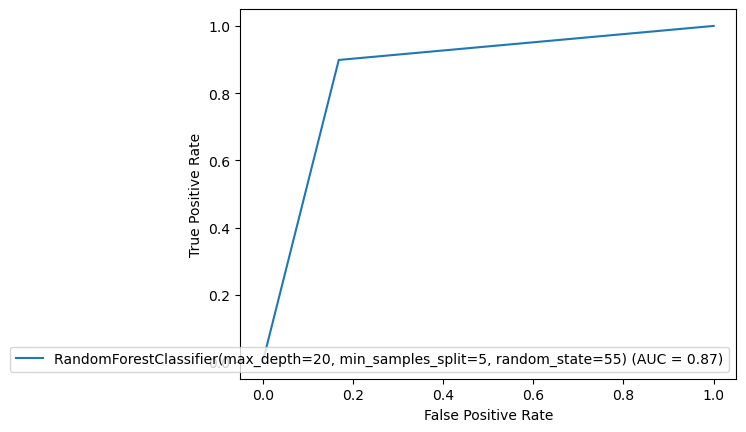

In [90]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(Y_test,pred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=final_model_2)
display.plot()

# Saving the model

In [91]:
import joblib

filename = "FinalModel_9.pkl"
joblib.dump(final_model_2, filename)

['FinalModel_9.pkl']

In [92]:
model=joblib.load("FinalModel_9.pkl")

prediction=model.predict(X_test)
prediction

array([1, 1, 1, ..., 0, 0, 0])

In [93]:
a=np.array(Y_test)
df=pd.DataFrame()
df['Predicted']=prediction
df['Original']=a
df.head()

,Predicted,Original
0,1,1
1,1,0
2,1,1
3,1,1
4,1,1


# Applying the model to the test data to generate predictions.

In [144]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Bank%20Marketing/termdeposit_test.csv')
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,services,married,secondary,no,118,yes,no,cellular,15,may,20,6,-1,0,unknown
1,40403,78,retired,divorced,primary,no,2787,no,no,telephone,1,jul,372,1,-1,0,unknown
2,3709,31,self-employed,single,tertiary,no,144,yes,no,unknown,16,may,676,1,-1,0,unknown
3,37422,57,services,single,primary,no,3777,yes,no,telephone,13,may,65,2,-1,0,unknown
4,12527,45,blue-collar,divorced,secondary,no,-705,no,yes,unknown,3,jul,111,1,-1,0,unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,management,married,tertiary,no,45,no,no,cellular,28,aug,148,4,-1,0,unknown
13560,11743,54,blue-collar,married,primary,no,2281,yes,no,unknown,20,jun,158,1,-1,0,unknown
13561,28292,35,retired,married,primary,no,285,yes,no,cellular,29,jan,136,1,-1,0,unknown
13562,45163,29,admin.,single,secondary,no,464,no,no,cellular,9,nov,208,2,91,3,success


In [145]:
df.shape

(13564, 17)

In [146]:
df.dtypes

ID            int64
age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
dtype: object

In [147]:
df.isnull().sum()


ID           0
age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
dtype: int64

<Axes: >

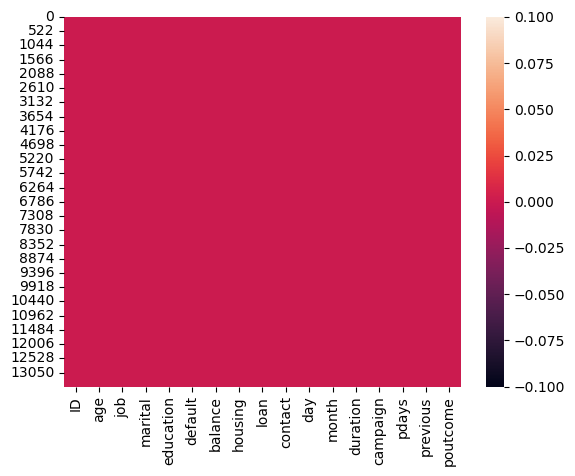

In [148]:
sns.heatmap(df.isnull())

# Encoding of object data-

In [149]:
months = {'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6, 
          'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12}
df['month'] = df['month'].map(months)


In [150]:
# Initialize LabelEncoder
label_encoder = LabelEncoder()

# Assuming df is your DataFrame containing categorical columns
categorical_cols = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',  'poutcome']

# Encode each categorical column
for col in categorical_cols:
    df[col] = label_encoder.fit_transform(df[col])

In [151]:
df

,ID,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,38441,32,7,1,1,0,118,1,0,0,15,5,20,6,-1,0,3
1,40403,78,5,0,0,0,2787,0,0,1,1,7,372,1,-1,0,3
2,3709,31,6,2,2,0,144,1,0,2,16,5,676,1,-1,0,3
3,37422,57,7,2,0,0,3777,1,0,1,13,5,65,2,-1,0,3
4,12527,45,1,0,1,0,-705,0,1,2,3,7,111,1,-1,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13559,23465,39,4,1,2,0,45,0,0,0,28,8,148,4,-1,0,3
13560,11743,54,1,1,0,0,2281,1,0,2,20,6,158,1,-1,0,3
13561,28292,35,5,1,0,0,285,1,0,0,29,1,136,1,-1,0,3
13562,45163,29,0,2,1,0,464,0,0,0,9,11,208,2,91,3,2


In [152]:
x=df[['age','balance','day','campaign','pdays','previous','poutcome','duration']]


# Distplot

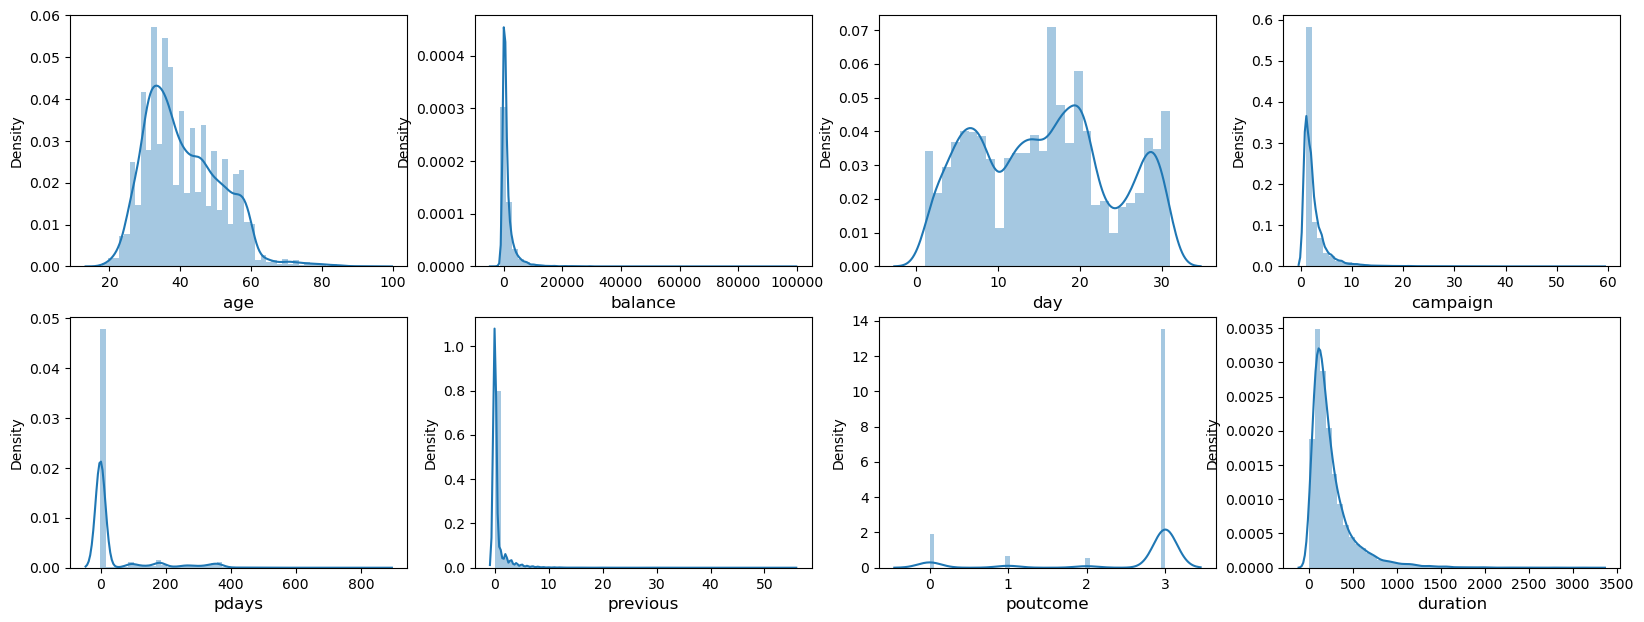

In [153]:
plt.figure(figsize=(20,15))
plotnumber=1

for col in x:
    if plotnumber<=8:
        ax=plt.subplot(4,4,plotnumber)
        sns.distplot(df[col])
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

In [154]:
x.skew()

age         0.692404
balance     9.165015
day         0.106806
campaign    4.958236
pdays       2.555601
previous    8.704583
poutcome   -1.921847
duration    3.017221
dtype: float64

In [155]:
# List of columns to apply cube root transformation
columns_to_transform = ['age', 'balance', 'campaign', 'pdays', 'previous', 'duration']

# Apply cube root transformation to specified columns
df[columns_to_transform] = df[columns_to_transform].apply(np.cbrt)



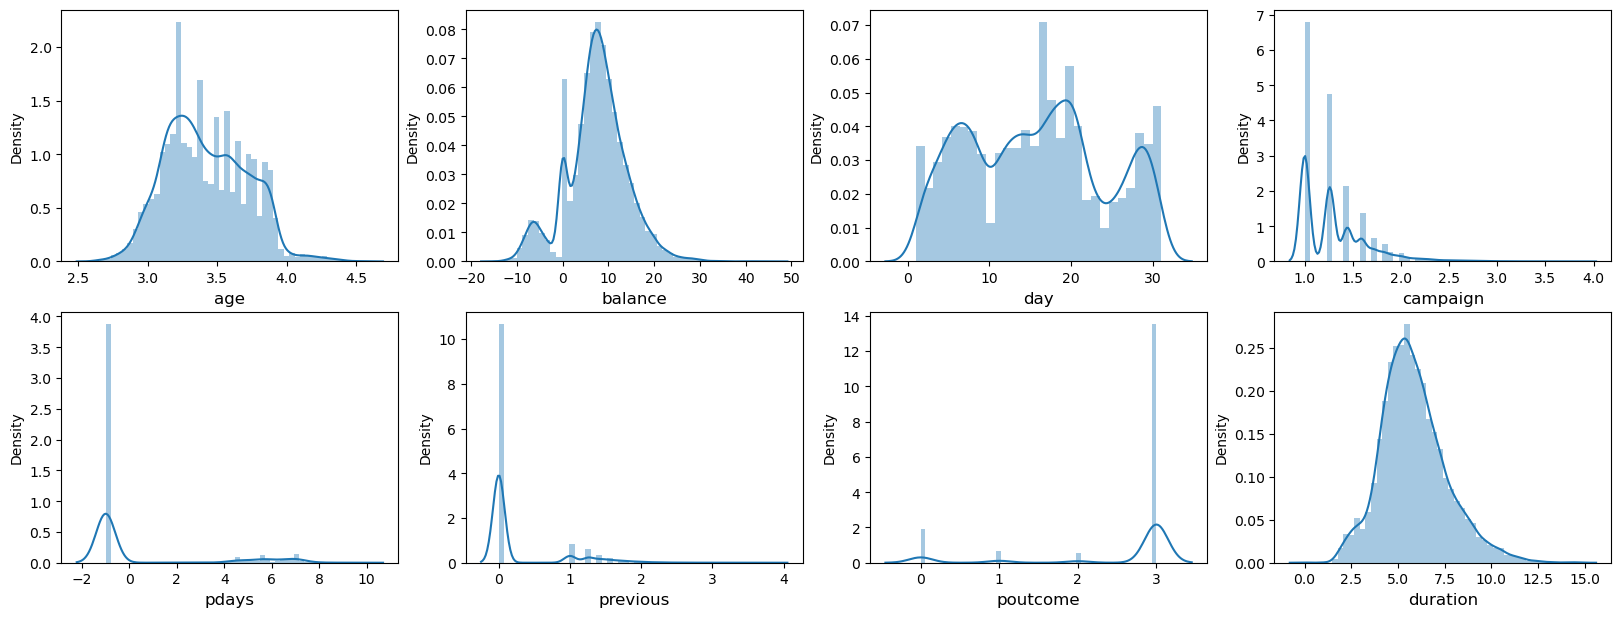

In [156]:
plt.figure(figsize=(20,15))  
plotnumber=1

for col in x.columns:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)   
        sns.distplot(df[col])  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show() 

# Boxplot

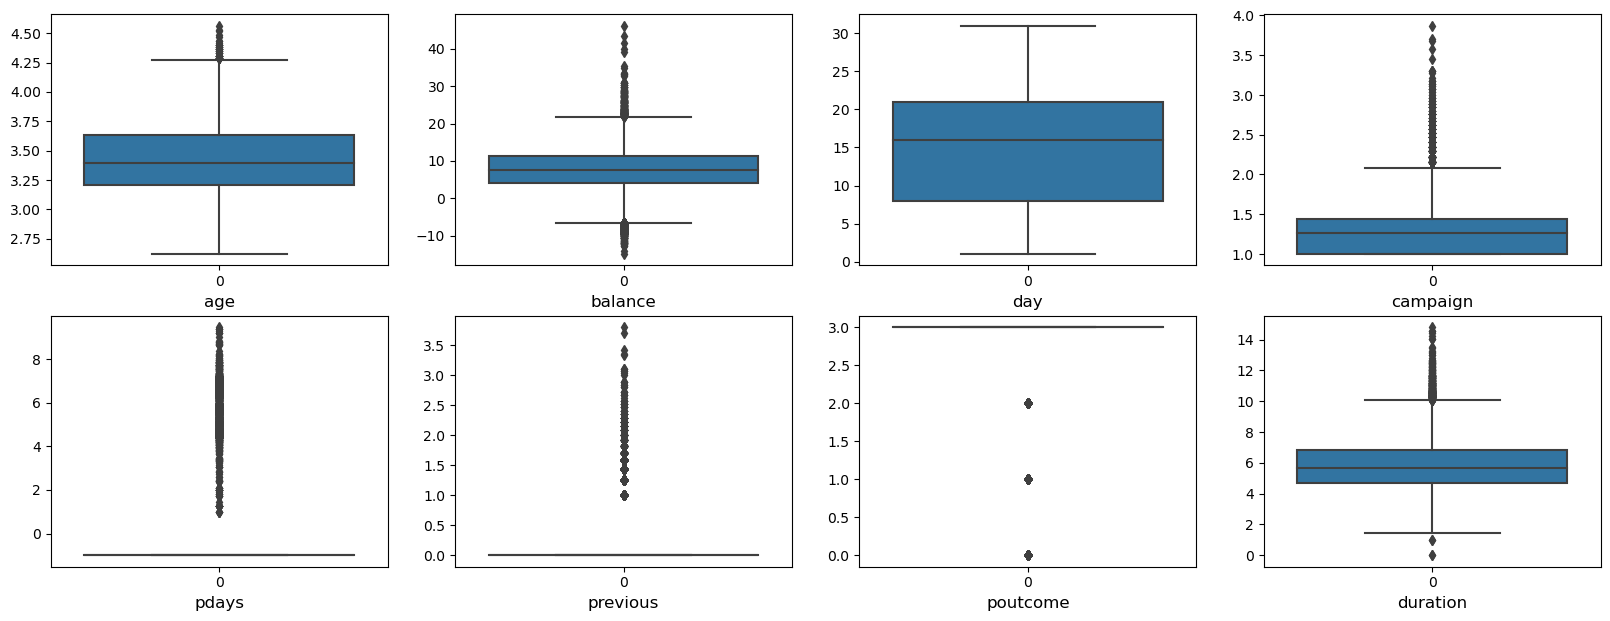

In [157]:
plt.figure(figsize=(20,15))  
plotnumber=1

for col in x.columns:
    if plotnumber<=16:
        ax=plt.subplot(4,4,plotnumber)   
        sns.boxplot(df[col])  
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()

# Z-score method-

In [158]:
df.shape

(13564, 17)

In [159]:
z=np.abs(zscore(df))
z.shape

(13564, 17)

In [160]:
threshold=3
print(np.where(z>3))

(array([   28,    52,   113,   117,   131,   140,   149,   173,   231,
         235,   258,   270,   307,   315,   323,   346,   369,   380,
         388,   393,   423,   428,   432,   437,   453,   468,   475,
         478,   537,   547,   548,   558,   566,   566,   577,   598,
         634,   668,   677,   693,   704,   709,   749,   804,   809,
         818,   823,   858,   864,   895,   903,   936,   982,   994,
        1029,  1031,  1033,  1042,  1048,  1049,  1062,  1075,  1086,
        1103,  1136,  1167,  1242,  1250,  1257,  1261,  1272,  1289,
        1316,  1319,  1330,  1368,  1374,  1377,  1384,  1394,  1399,
        1407,  1413,  1418,  1440,  1465,  1473,  1515,  1530,  1548,
        1557,  1571,  1571,  1592,  1605,  1609,  1677,  1693,  1707,
        1715,  1743,  1766,  1798,  1815,  1852,  1873,  1874,  1929,
        1978,  1988,  2030,  2038,  2043,  2052,  2055,  2056,  2071,
        2072,  2081,  2122,  2127,  2133,  2138,  2201,  2202,  2203,
        2225,  2239

In [161]:
df=df[( z<3).all(axis=1)]

print(df.shape)

(12709, 17)


In [162]:
data_loss=(13564-12709)/13564*100
data_loss

6.303450309643173

# Featutre scaling-

In [163]:
df=df.drop(columns=['ID','balance','loan','default','day','month','poutcome','age','campaign','poutcome'])
df

,job,marital,education,housing,contact,duration,pdays,previous
0,7,1,1,1,0,2.714418,-1.000000,0.00000
1,5,0,0,0,1,7.191966,-1.000000,0.00000
2,6,2,2,1,2,8.776383,-1.000000,0.00000
3,7,2,0,1,1,4.020726,-1.000000,0.00000
4,1,0,1,0,2,4.805896,-1.000000,0.00000
...,...,...,...,...,...,...,...,...
13559,4,1,2,0,0,5.289572,-1.000000,0.00000
13560,1,1,0,1,2,5.406120,-1.000000,0.00000
13561,5,1,0,1,0,5.142563,-1.000000,0.00000
13562,0,2,1,0,0,5.924992,4.497941,1.44225


In [164]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(df)

In [165]:
x_scaled

array([[ 0.80659586, -0.27676031, -0.30209399, ..., -1.86729158,
        -0.46057445, -0.45589358],
       [ 0.19726803, -1.91807939, -1.64451096, ...,  0.81522761,
        -0.46057445, -0.45589358],
       [ 0.50193194,  1.36455877,  1.04032298, ...,  1.76445858,
        -0.46057445, -0.45589358],
       ...,
       [ 0.19726803, -0.27676031, -1.64451096, ..., -0.41257887,
        -0.46057445, -0.45589358],
       [-1.32605155,  1.36455877, -0.30209399, ...,  0.05617777,
         1.58343541,  2.3790482 ],
       [-1.32605155, -0.27676031, -0.30209399, ...,  0.68385378,
         2.56083591,  1.50974526]])

In [166]:
model=joblib.load("FinalModel_9.pkl")

prediction=model.predict(x_scaled)
prediction

array([0, 0, 0, ..., 0, 1, 1])

In [169]:
df=pd.DataFrame()
df['predicted']=prediction
df

,predicted
0,0
1,0
2,0
3,0
4,0
...,...
12704,1
12705,0
12706,0
12707,1
